##  Setup

In [1]:
import sympy as sp
from sympy import I
from sympy.abc import t

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Arrow
from matplotlib.collections import PatchCollection
from matplotlib import animation
import IPython.display

# Vibração Forçada 2GL -- Visualização

Neste notebook vemos uma visualização do movimento e das magnitudes relativas das forças que agem um
problema de vibração forçada com dois graus de liberdade.

Este notebook **apenas** pode ser usado para sistemas que podem ser representados como mostrado no esquema a seguir.

### Imagem inline

In [2]:
from base64 import b64decode
# This is to avoid distributing an external file.
image_b64 = \
"""iVBORw0KGgoAAAANSUhEUgAAA0gAAAC7CAIAAADQaymmAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAg
AElEQVR4nOzdeUBMaxsA8GeqUQ2KFqV904pKIQpJyNKChBSlyJrdh5Cda2vhupaI7HtF4YpCURQV
pU37piJGTfvM98e5xpiZ0qb1+f11es+Z09tyZp7znPd9XhKDwQCEEEIIIdT58bR3BxBCCCGEUOvA
wA4hhBBCqIvAwA4hhBBCqIvAwA4hhBBCqIvAwA51IyoKit6enu3dC4RQ6/P29MQLHCHAwA4h1DaK
i4vr25Wbm1tVVdWWnUEIoa4KAzuE0J9VV1cX6O9/NyCgvuJK9Dr6Me+j2VlZbdwxhBDqejCwQwj9
WT6nTt+7e9fRyYlEInE9QE5ebrr1jAnjTD8kJrZx3xBCqIvBwA4h9KcwGIyrl688e/r06PHj9UV1
BEVFxbPnz211c/v8+XObdQ8h1GwMBuPe3bv1peHfv3v/8uXLNu4SImBghxD6U97ExGzZvHm69Qx+
fn6uByS8f8/cHmloKCUlbTfHtra2tq06iBBqjurqahdnZ4ogpb4btoGDBj55FBL+/HkbdwwBBnYI
oT/n9MlTPXv2NDEx4bo39MmTUydOsLZMnGSWmpJy5/btNukdQqg5qqqq1q9dO2HixLHjuF/ahKUr
lp84fvyCn1+bdQwRMLBDCP0RGRkZj0NCplqY9xUR4dxLpVLdNm6ytrFhbTQYMQIAbl6/3kZdRAg1
EYPBWLjAiYfEY21j0/D4ir59+567cOGYt3dqSkqbdQ8BBnYIdQH1DXNpic+fPwfdu+dx+Mi61WtC
Hj0iGr+Wft23Z+//1m9gfYRanwP79jEYjHGmpmztcbFxf+3bP2qkYVFx0cuIF5cuXGTuEhERkZWT
i4+Lz8rEGbII/edPXODNdv3q1RcRETNn2XDdS6VSj3l5M7/k4+Ozspo2d45tdnZ2W3UQYWCHUOdX
UFAwYuiwmNfRrXhOMh/fyJGGVVWV/nfuXLt6FQC+ln6dNGHCubNnb9+8WVJS0vDLS0tLH/37iIeH
Z9To0Wy7+kn009bWLi8rMzQ0mm07Z/yE8cxdJBJprMnYmpqaixcutOLPglCnduXSpdWuK/Pz89u7
IwAAfuf9+vXrRyTXOV25dKmisoK1Zdz48V8+f76Bafg2hIEdQp2elJSUqprqrJkzW/HdX0hYuK9I
34lmZgBQkJ8PAMFBQVMtLKKiXz+NCB9jbNzwy4uKigBATEyMTCaz7erfvz+dQQcAlQEqcvLy/SQk
WPcOHDQIAN6/i2+VnwKhLmCqhcXdwEAz0/EXzvvV1NS0Y08yMjJSkpPHjjPh4eESPFCp1PO+59hi
PmUVZQB4FRnZRl1EGNgh1DUcPX5cWkbmbmDguDHGTg6OF86fb5UIb9DgwcJ9hDMzMtNSUz99KnTb
uqVP375SUlK/fSFRbVhIWJjr3sSERADQ1NTk3CUrJwcAb9/G4loUCBGEhIROnj5VU1Ozw919uL7+
xg0bAv0DKioqfv9KDu/i48/5+u7Y5r5u9ZqvX78CQF1dXcAd/3Vr1gTdu/fbl+P4ik4BAzuEugIh
ISE7OzsAqKmpeRoWtsN9++iRhq7LllfQaC05LR8f3+jRYyorK6dbWdnZ29d3WFRkJFsc+e3rVwAQ
EBDgejxRiFhTayDnrr59+gBAbU3N9+/fW9JzhLqScePHm4wbBwDUb9Sb12+sWbVqkIbm8WPH6ppY
G0hCUnLy5MlPnjzxv3Mn8sVLALhx7fqG9esC7vgnJiQ0/FocX9FZYGCHUBcxc5aNqpoaa0twUNAg
Ta05NrN279x56cLFuNi4sqZHS8R7tKnpePF+/Tj3fkj8sGXTZucFC8rLyljbaRUVACAgwKV8HYPB
+JCYKCwsrKSsxLm3T9++/52hvLypXUWoC3N0WsDWcuTQYd3B2iuWLjt88ODlixdjY2OpVGrDJ+nX
r18/CYnpM6YDQEpKSmZGRkZGeszb2Lfxcev/97+GX5uRkQEAUlJSXMdXEPm/IXpDOMdXEA9nnzwO
6VCzQLowvvbuAEJtytvTy9vTq7170aZev3r1+tUr5pfq6uozZ88aZ2oqIyPTmJcrKikBwPPnzzh3
HfM+KioqOtXC/OqVK2y7ftRB4FINISU5paioyGb2LK5Vi1kKKDRUSQEhrrrbBU6j0e4HB7O2qKqp
zbG1HWM8Rk5evr5XESNZ372Lv3Xjxu3AgF69ezXme+Xl5ABAz17cD/4vDa+pxblLQlISALIys8rK
ynr37t2Y74VaAgM7hLqXpKSkXdt37Nq+Y6yJyQxr6xEjRwj36VPfwbm5uceOHpWVk8vJzs7Ly5OW
lmbd67xooYCAQG1tLWc5K+Ltmy2NR7h14wYAsFWwYyosLCQ2hISFmvJjIYQAAFKSk3e4u5PJ5KHD
hlrb2JiZmfXguINSUlIGgKiXkRevXBYVFWXdxWAw7gYGhj97XlpaKt5PfKaNje6QIcSuchoNAATq
WUUmkQjsBnIJ7Pr8eIcpLy/HwK4NYGCHUDdCoVBmzrIxmzRp6LBhjTn+9q1bRzw9169dm5OdnZqS
Ii0tXV5eTgISpScFfgyh4+Pj40yuycrKAUA5x+NUBoNx+9atvn37DvnxacHmU+EnAOjfv3+f+sNN
hFB97OfNm2phPlhbm/OBKZO8gryAgEBNTQ2RumN16MCBhw8ejh07Ni0tNfTJkyePn0S8fMHLxwcA
lRUVAMDPbeAsg8H48CFRTl6e7d6PwLyWaeUtGvKLGgkDO9S9uK5a6bpqVXv34o8oLi42nzSZrcIc
hUIZP3GivLycnp6+orKShIQELy9vw+f5/v37u/h3Gpoa/z58KCMjw8/PP2CAKkBQWGiogYHBlUuX
bGbP/m1nBgwYQKFQSkpKqqqqWB+5ZmVlff36VUdHBwACAwKMx44VEvolM/cuLg4ArG1mNv4HR4ip
C1/gYaGhzo7sw+xk5WRNTMb1l5IaoDpAZcAArnEVp6ysrN69excXF0eEh7POhIh+HQ0AAffu9uzZ
s7a29tbNm1s3u509c3ahyyIA4OcXAIDq6mrOEz55/KSyorK+y7bsR+a+vtlUqHXh5AmEugi/c+fY
ojq3rVviExMOexxxXbXKcJSRlJTUb6M6ALhx7dq8uXOHDdF7FRk1bfp0AFBTVwOAi34XBmsNVNfQ
YAvFuBISFrKZPYtGoz1/9svgvJLiYgBITk52nDe/R48enKe6dfMmmUx2WbLkt98CoW7lwvlfFl0V
Fxf38fUNffZs63Z350ULxxgbNzKqAwD/W7e379oJAA8fPGBtr6qqWv+///Xs2RMA+Pj4Zs2eLdm/
P3OZGeE+wsAtDQ/M8RUzuQd2n36Mr+jTF9PwbQEzdgh1BSUlJdevXgMAUVHRseNMxowxNp0wvoFn
MQ0YaWhkbmkxcOAgR6cFxOC50aPHLFm27DuVam5pMURPr5HnWbZiRdDde1cvXzEd/7P2gbqGhp29
PS8f76TJk/X09dlekpWZmZ+fP9XcHO/sEWJ15/btp2FhADBgwABjk7Em48bp6etzrRL8W4H+ASqq
A8aMGSMgIPDo4b+bt2yhUCiRL14ajBxhaGTIdjCZTDb5UbVOWVkFADhn1peXlz97+lROTq5fv355
ubm9hYTYbtiIWki6Q3QpFEozOoyaCgM7hDo9Op3uYGdfUVHhvmPHbNs5zYvnmNQ11D28fplXKCAo
sHb9uqaep2/fvlYzpp8+cZJ11kWvXr2IVAFXEeHhADBnrm1TvxdCXVh+fv76NWtV1dR27dnNeTvU
SP8+fFhXW0fp2TMwIMDH9ywAKCopfUhMDAsNzcrMVFZR4XwJlUrtQSZbWFoQXw5QHSAmJlZYWPj9
+3fWORCZmZmVlZXE1NfgoKCFLi5s53n+9BkAOCxgf46M/hB8FItQp0f99m35SteIqEj7+fNaGNW1
LgdHR0UlpZvXbzTm4Lq6Ov/bd1atWT1s+PA/3TGEOpFv377d8ve/GxzU7KgOAM6cPr1i2bIb164e
O/430TLcYDgA7HTfLtynD2tanUCj0ZYvWeqy9OegCB4enk1b3BgMxs1fF34lk8kkEikuNnbL5s3G
Y03YzlNZUfnvw4fS0tLE+oSoDWDGDqFOr0/fvmaTJrV3L7iQkJAIvHfX0tzCYYGjcD3LizF5HD4i
pyC/3NW1bfqGUGehoaHR8pMc8fTMzy/QH6rPLE60yc1tnKmpppYW12vT7/x5TS1Nq2nTWBstrax8
Tp66evmKo5MTs1FVVTXowQNyD7KioiLneVJSkr9//z7X3p6PD+ONNoIZO4RQi2RnZTHojPSP6Vz3
ClIou/bsdnFe+PHjxwZOcufW7dzcnP9t2vRn+ohQdyctIzN02FDWkpO8vLwjRo7kGtWFhYZ++/qV
6/Xo6Oz08eNH1prnAKCqpso1qgOAfx88FBMXnzXn91PpUWvBwA4h1Ewx0dFuGzdNnTwZAFxXLF+/
du39oGDOw4YbGPj6nT994mQD50nPSPf09hYXF/+D3UUINUJCQoLnEY/Va9dyFh4HgGnTp48bb3r5
4qXGnKq6uvr2rVsXLl2UlZVt7W6iemFqFCHUTHr6+nr6+nv27/vtkYKCglvct9W3V1lZRVtHp1W7
hhBqjk+fPj28f//K9Ws9evSAHys7f/nyxWjUKOIAEol07Pjx9WvWXr1yZdbs2VyDP8KXL1+WLVmy
3HXFAFXVNuo9AgAM7BBCbaNXPUtMAla3Qqhj+Pb1q8XkKcJ9hJnlJ7+Wfs3JyYmMfs16GJlM3n/g
rzmzZomLi4/7UQyFk7enl4OjI86ZaHsY2CGEEEIIMjIz59rbsTVKSvYXExNjaxQQFLx+61bQvXv1
nSoxIXGc6TjWZS1Qm8HADiGEEEKgo6Oj0+hBEWQymW3OLCtNLc1W6hRqMpw8gRBCCCHURWBghxBC
CCHURWBghxBCCCHURWBghxBCCCHURWBghxBCCCHURWBghxBCCCHURWBghxBCCCHURWBghxBCCCHU
RWBghxBCCCHURWBghxBCCCHURWBgh1CHRqfTS0tLa2trG3n8i/CIj2lp9e29d/dedXV1K3UNIYRQ
h4OBHUIdV2pKiuVU84ULnCaMG/f169ffHv/4UciLFy+UVVTqO0BaRnqahcW3b99atZsIIYQ6Cgzs
EOqgcnNyrKdNt51re/PObeo3qsehww0f//bt2xXLls21m9vAMbq6umOMjY8dPdqqPUUIIdRRYGCH
UAe1f+8+MXFxy2nTAEBBUUFCUrKBg3Nycna6b7987Wp/KamGT7tuw4asjMxjXt51dXWt2V2EUOPg
+Ar0R2Fgh1BHVFBQ8PDhA7ctWygUCgDcvHNn6fJl9R1cWVk5e6aNqqqqjq4u1wNqamo+l3wmtnl4
eGzt5np6eIQ+fvIneo4QasAfGl+Rk53dqt1EnRgGdgh1RJs3bqRQehqNHtWYg69cuvypsHCC2USu
e8vKypwcHPPy85gtI0aMkJWTO+NzunX6ihBqnIf3H1hMmbp127abd25/LvnsvmVrw8efPnnq6pUr
LksWN3CMrq7uxs2bnRc4hfz7qFU7izorDOwQ6nC+ff36/OkzJSWlHj16NOb4mzduAICBgQHXvV4e
nlFRkRrqGswWfgEBJ2en169ePw0La43+IoQaxcvTc6Sh4TCD4QBgYWVpP39+Awe/fPHinK/vqTM+
vXv3bvi0o0aPPnH6lNumTRUVFa3ZXdQ58bV3Bzq3hISEgvz8goKC4k9Fa9ava+/uoDZ1/NixtNS0
UWNGjzM1FRISapVzPg0LexMTU1JcAgDUb988Dh8GgGHDhhuOMqrvJe/i36WmpAwcNLBnr16s7QwG
4+aNG0F370WEh/fr1+/YUW+zyZM1NP4L74zHjgWS+6EDB41GjeLl5W2Vzrej4qKitLS0oqKi7Kzs
WXNm9+vXr717hDq9SxcvvouPHznScPzECYKCgi0/4YP791NTUjy8PIkvd+3Z08DBKcnJixe5ODg6
kkgkrge8fPGir4iIuro68aWioqL+0KGzZlhfvHqltd6OUCeFGbsWSUxI3Py/jTu2uSckJLR3X1Bb
W7p8eVJS0vo1a40MRhz18m6Ve+WBgwbNsLZWUFQAgBGGI2dYW8+wth6so93AS86cPk2n003GmbK1
MxiM4cOHMxh0BoPh4e01w9paWVmZuVdGVlZUVPRDYmJWZlbLu93uPn36FOgfsHbV6uPHjomKiLR3
d1BXYG5hcfP6jTWrVg3S0Dx+7Fhdo+c61Gfn9h3i4uJqP0Kxhl29crW8rGzcePbrmvCp8JOTg6Og
gABro+n48YmJifeDg1vYT9TZYWDXIjNtZkr27w8Ac+3t27svqB0sWboUAGg0mpeHh6GBwcYNGwL9
A1oS4YmKisrJy5eVlQOAjo6unLy8nLx8Aw9i6urqIsLDAcBgxAi2XTw8PGLi4m9i3khJSw0bPlxO
Xp7twa6MjCwApKd/bHZvO46BgwZNnjKF2ODlwwcRqBUICQldvHyZTCYDwJFDh9VUBqxc4Xr54sXS
L1+adB46nV5XV5eVmVX06ZOComJdXV1dXR2dTm/gJTXVNfeDg3v27KnOEQUyGIw3MTErli0TFRXt
LyXFep7B2oMBIOju3SZ1r+0xGIzy8vL27kVXhoFdi9BotMSEhN69e5uMM2nvvqB2MMV8KvOdl/qN
ynp//6WJ7/6sMjMzAEBZRfm3R34uKSktLQUACQkJzr2pKakVFRWaWlpcX9urVy8AyM3JbXY/O5TM
rEwA0NZuKLuJUJMYjBxhOc2K+WXQ3bvbtmwdOkTvqJd3cVFRI0+yb89eNWWVccbGAPAqKkpNWUVN
WcXj8JEGXhIcHFRcVDR8hAHbzRidTp8za5bNDOs3MTEFBQWaqmr3WMI4eQUFXj7eV1GvysrKGv8z
tpm62tozPj5rVq4yHjV6w1ocufQH4a1ti7x/9w4ABuNnSecRFRnp7enZiiccoq+flJTE1njk0OEj
hw5LSkpq6+jIK8gPUFXV0NCQV1Bo5EidzIwMEomkpKTE1l5TU/MqKsrQ6Od4u3IajdgQ7iPMeZ4P
iQkAoKnJPbATEBAAABqti9w6ExfjIO3B7d0R1J5a/QKnldM4G708PLw8PGTlZDU0NOUV5BUVlbR1
tOUVFAR+fTZKWL12zfIVy69dvXZg//6ly5c7OTsBgECDbwXXrlwFABOTcWztJBLpxKlTtrNmZWZk
PnryuFevXr1Y0vl8fHwjR458/ux5oH+AbYOFytsFA0BXV/fQXwdqamo2ubm1d3e6MgzsWiQuNg5+
JMBRpxAVGRUVGdU236uwsLDwwQPWFl1dXXuH+aPHjOnTp08DL8zMyFRXVxfmOOZ/69Y/f/7s9Zs3
zJbKH499uQ6XTkz8AAD1Zex+BHZcPrc6o/i4OMCMXbfXlhd4TnZOTnYOa4u6urq9w/zxEyaIsAz0
pFAoQKEUFxcBgKamJud1zaa6uvr1q1cAoM0xuJZEItXV1aUkp6hraEjLyHC+drC29vNnzx+HhHTA
wI6Pj09JWbmmpoZCoUyspzYTahUY2LVIfDwR2GkDQElJydPQ0OzsbAAQEhYeOnQYBnyISU9PT01D
Q1paWlhYuLKiAup/c09ISCgvL59iPpXZUl1d/fjRo4KCwpjoaLaD+fn/yxCUl5dzDsX7kJgIAJpa
mly/EVGtnnmGTq0gPz8jPUNBQUFWTg4A3rx5E/E8vLa2BgCUlJUtrax+dwKEmo9CoQxQVVVXV5eQ
lJCQkKisrGQwGGyzWTMyGju+oqSkhMFgAICwMJd3icSEhi7qPn36AkBiYmLTf4i2kJaaCgCDtQfX
N9UXtQoM7FokPvZnYCcmJjbO1NRg2HDT8ab7Dxzo9WvtCdRBuK5a6bpqVSueMDc319iIexlhMTGx
KeZTLa2smvSwPuxJKABYTZvObCGTySampvz8/Anv3z979pT14D4/nsAWFRWxBXYMBuNDYqKSkpJU
PYuMEQNxGs4ddhY3rl+vra2dbWtLlG4ZMmTIvt17cnJyTvqcxhxet9LqF/jTsDAnB8f69i5ycbGc
Nk1JWYmYY9GAzIxMXl5eBUVF1sZPhYXh4eH8/PyGRkZ9+/YlGplJdK7X5n/jK+pJwxMn+VxSwhlZ
dgTv4uMBYPBgvCT/LAzsmi8pKSk/P19bR5somhX9+rWXh+cRTw9idh7qDr6Wltrb2rK2CAkLTZg4
ceRIw5FGhn379m1GibjQJ09kZGQk+/9cGZZEIvHz8wMAuQf7h0dfERElJaX09PSC/HzWaiYA8Djk
cWVl5bTp0xkMRlhoqPHYsWxv9N+/f4fGpRA6uNra2uvXrpPJZKvp0wCgrq7umJe3ygAVT28vro+r
EGq8M6d/WaCFQqGYjh8/aszokSNHNrx8M6vy8vK83NzRo0cz4z86nb5z+/ZXUVEkEk9aaqqoqOjO
3btMJ0wAAGZdlR78XOqT/ze+osGBs3Q6vba29rexZtuLj4sHAKJ+E51OJxKTTF2goGYHgbNim+/y
hYsMBsPOfh6JRIp+He3t6eXrdx6jum7lxrXrzEE2FApl5erVEZGR+w8csLCyFBMTa8b7VGVFRezb
t+oaGr8/FAAASCTSPIf5APD82XO2XQ/uBwOAtq5OyKNHDDqX2/fsrCweHp4ukNBKT08vLCgYMGCA
mJhYWVmZzQxrUTGxfX/9hVEdaqHAgIAXES+YX65Zt/ZtfNwRL89p06c3PqoDgNevXtXU1FiwTLD1
POKhqqoa/PBh0IP79x/9W11dvXTxEuJeS1CQQhzDdSVZYnyFVj2PYr+UfgGAnj17dsCoDgDi4uLg
R8buVVSUlbkFMUd4yGBtn9O4wmGrwcCumSoqKu7dvUuhUExMxx05dHjLpk0e3l589RfQKikpKSgo
aMseoj+NSqVevHiRQqFYz5x57J/j4ZEvV6x0bWGF+oyMTADQ1tFp/EtmzJwpJi4W6O9fU1PD2t6z
Z08A2LJp87dv30xM2afXvQiPoFKpLksW9+z8YwaIERGDtAfHvn27YL6D68qVc+3tuB5ZVlaWmJiY
kpyMKy+h30r/+HHLps1CwkLWNjOPeHq++5C4dPny5lVJDH0Sys/PP3bsf1WxaDRa2ffvs+bMIb5U
UlIyt7Sg0+n5eXkAICYuRoRlnz59YjtPcXFxVmbm6NGj67tsPxUWQkct1PAxLS0nO1tTU7O/VH8A
0B0yZOiwoeLi4jt27YyJi3VZ3NB6uKhJ8FFsMyUnJVOpVJUBA+zm2KampNTW1jZQcPLZ02cLnRZ4
eHn1x3xeF7Ji6VIHRwdHJ6dWPCdRwW7EyJGNf4mgoOBUc/NzZ30zMjJUVVWZ7Tt27bK0stLW0eGa
OLxy5XK/fv3Wrl/f8j63O2IOU3ZWtt0c28rKyszMzDEkY7ZjqqurD+zff+G8X11dHQAMGjTo8rWr
ghRK2/cWdRb+d/wXurg4L1rY8vXEwp48UVJW7tX7v2iMQqFs27Gd9QCiWjhRu4RCoegPHfryxYu8
3FytX8fSBd8Lqq2ttbCyotPpO7a5b9+1ky0Tn5ubCwBmk8xa2OE/4erlKwwGw9bOjujz/j17q6qr
wsKfE+NMUCvCjF0zEbUV+Pn5d+/dM2vObAC4H8RlIZf4uLhbN29ev3q1rraurbuI/jBfP7/WjeoA
IC01TU5Orr4pb/WxnTtXSFj43wcP2dqH6OlxjerS0tIe3n/Q6p1vL0TVIW0d7bDw53369vHy9Pzy
+TPbMcePHevZs5eHt9ffJ/5xWLAgNTXVznZuVVVVe/QXdQ6r165peQ4eAD6XlOTl5WloNjS+Ijc3
Z/yECZI/Hu8ud10BJPC/fYftsKjISABISvpw5vRphwXsy8hWVlaGPn4iLCxsNW1aC/vc6qqqqvzv
3BEQEJg8dUpaauq6NWsGDR68d/9+jOr+BAzsmokI7GbbztHW0ZloNgkAuK7Qp6amNsPaes5cW85d
qLPj4Wn9yyfpw4eVa1azlZv/LSVl5TO+Z69fvdrwOkVMVy5dHqA6wGFBvXP9OhFaOe1DYiIvL+9y
V1cxMTFj47HUb9+ePH7MegydThcX77d67ZrJU6ZMNDPbsm3r+IkT4mJj83Lz2qvbqONrrVmlxPgK
ff2hDRwTHxvnedSbeRs23MBATU390b//so0ZGDpsKAAE3PEfZzpekaOAeVpqGpVKHVX/g9p2lJqS
Ulpaqq6h/v37d/u5dvLyCtOtZ9R3cER4+OmTp5I5Cr+jRsLArpmIQaC6uroAoD9UX01d/e2bN0RV
SQaDkZCQQBzGLyAAAE39nEbdSnVV9Yqly27euEGj0YBEMrewaMZJdIcMmb/AceGCBVQqteEjn4aG
5eXmXL1xo2MOr26qq1eu0On06dYziPmAEydNAoC7P9ZZiouNKykp+VpaOuHXgqiqqmoAQGc0Kg5G
qCUyMtJJJNKIkeyrORPKysqWL13qsGABW+5q1pzZDAaDrXSlo5PT8xcREVGRSsrsUR0ARL9+BQA2
s2e1Xt9bDZFW//z5i8/JU8BgnD55knMEIQCEh4c7OTheOO/3OCRkhtW0bW5b2IYOo8bAwK45CgoK
MtLTRUVF1dTVAaBHjx679+6pra1dunhxZWXlvj17qd++tXcfUadRVl52Pzg4KzNry6bNdvZ2DSQC
a2tqK2j1jvp3cnaeNGXK30ePNvC9Yt/Gum3etO/AAc5qxp3UxQsXAGDBj8fKxmONhYWFI56Hx0RH
p6WmHjl0UERERERUVFxcnPVVlZUVIiIi8vLy7dBj1M2kpaSOGDmSKJ3N6expnxEjR5pbst/OzbG1
lZWTC+YY4dNfSqq+t4jgoGC7efNGGhq2vM+tjhgIO8N6hvvOHeNMTWk02uNHjzgPe/3q1ZlzvidO
n7p64/pUC4vLly59TPvY5p3t9DCwa46L5/0AYL7jzyEOukOGjB4zpvRL6RybWYMGDzIYwf3mDCFO
IiIitwP8+/eXdFq0sL5pE9GvowPu+Ee/fl1ZWel75szzZ8/Ky7ms8Wo9c6bBiCXBBIAAACAASURB
VBHpH+t9K8zJyX4YEsIshdrZZWVmZmdlycrJDfgxa4RMJnsdOypIEZxvb3/O1/ekjw/XT8H3794f
++efrpGzRB1TSkpK0adPAJCenr7JbTPXY+4HB5N79Jhrx2USN5lMvnztakpy8puYmN9+LzqdfvrU
KWFhYbetW1rY7T+EmLo+xtgYACaamQEAZ8xaWlo6c+ZM5pfa2tpkMpnrKtjoNxjN8vbNm9WuK1et
cM3NzeXcGxsbu2blqlUrXHNzcpTlFbw8PJr3XTqXqqqq58+e02g0zl2voqKU5RWC7t1r+14hVt3n
v7Gby87KysrMrG/vjevX9+7e05b9QW3Ay8Oj41zg36nfVRQUd+/cVVJSsmHdeq7HvIiIWLZkCVGn
l/DyxUu2Y96+eaumrJKTk9Pwt9u9Y+dQ3SFFRUUt7PYfUlJSoiyvoK01sK6ujsFg1NXVGRoYKMsr
vIuPZzAYFRUVLs4LiV2sPA4dvn3zVjt0t22d/OfEqhWuN65f57rX//adVStcd+3YWUGraPw5m5Ox
u3jhwswZM96/f79o8WJpaWm2vZcvXbKZPuNdfPxCl0XdqkBojx49jEYZtXwKFUKohWTl5OTqecz6
+FHI40chi5csaeMuoW6Fl493jPGYgoL8877nlruu4Dzg48ePfx89NnLkyGtXr169cuXypUtHvbzj
YmPZDtPR1bkd4H/hvF9xcXF93+vKpctCfYQfPg5hG2/QcVzyuwAAdvPnEelzHh6e/X/9xcvL67ps
+e1bt455H93ktpk1s15VVRV07156RrrJOJN263SbKCkp8TxyREhIyNR0PNuu6urqfbv3rF29Oi42
1tzCQkCwCYt6N7mOXdC9ezvc3Rl0htfRo5zztx/cv79jm3tdXZ3nUe/6FrNDCKF2UV1dfffu3X9O
nWzvjqAuTlBQ0MfXt769X79+tZwytbKyMvLlS9Z2v4sXOQ/W1NJSUFQsLS2t72xjx5lINmUZjDbG
YDCIgbAOjj+n4RuNHm06fvzDBw92bHO/cuO6vIICc9fHtDTH+Q5EreaI5+F37wfXt9p1F1BZWTnT
xmbH7l2cuw4fOHjGx0dOTi4g6F5Th0Q3LbC7Hxy8ytVVUVGJa1R3+dKlHdvc5eXlMapDCHU0L1+8
uHb1KusK8bk5uTKy3eipAuog+vTp8z7pQ+OPp1AolPqLaXfkqA4ASCTSqzdchgke8fIsLi6WkJBg
G+qqrKIS+uxpZkbG9avXzvj4+J07t3Ez9xGKXUCvnr1Wr13L1lhdXc2M6jy8vdmiOjqdXl1dTRQB
qE/THsWmpqRgrq4ZiAnbtTW17d0RhLqp+Pj4k//8c/DwYaUf1b+qqqqC791r314h1G3x8/PLyMhw
ncDEy8urrKKy0W2ztLR0SnJK2/etzfTp26dP3z5sjay5Om0d9tXhnj97VlJS0vBpmxbYKSkr3w0O
5pqrW7l8hby8fGDQPYzqWOXm5oY+Cb118xYA3A0MfBwSkp6e3t6d6r5cV60cbmDQ3r1Abe3r16+b
//e/hITEMUZGI4cPHzl8uMHQodoDB4lL9GvvrqFWM9zAAC/wroREIo0wHCkqKtreHfmDVBQUvT09
mV8S4+oayNU9DQvbsmkz7+9q4zftUexUc3POxoZzda1VvLuTkpGRkZGRGWsy9rDHkfbuCwLWx3Co
++jTp8+9+/fbuxfozxpuYIBRXReTnJQ0e043Wrep4XF1z589c3JwFBcXF/vdLJmW1rFLS01ds3JV
XV3d/oMHOKO6su/fGQxGC78FQgghhLo2KpX6LOwp88uszMzUlNSxXX1iLFPRp09nfHwAwGXpEs6o
rqqq6u+jxwDA1t7utwU4mzwrllVaauqqFa7V1dVuW7dYs9QVJJR9/+7ivLAl50cIIYRQdxATHbN6
5UplZSVzCwsKpWdZWdn9fx/269ctxks8CQlZ5LxQWFh4w6aNM6yt2famp6dvXL+BWEncydn5t2dr
fmCXlppqMWVqdXX1/oMHuEZ1RiNGlpWVAQCJhOtbIIQQQqheY03GvoqJ/pCYKC0jIyYm1t7daTtF
nz4tcl4IABs2bZw1ezbb3qqqqo3rN7yJiVm5ZvUKV9fGnLCZIVdjcnVlZWW2dnZ8fHwMXGkbIYQQ
Qg3q0aOHto5Ot4rq3r55O3K4gbCw8J79+7jm6uxt5zY+V0doTsaukbk6s8mTduzaeZlbxUWEEEII
oe6MTCY/f/YMWi9XR2hyYNf4XN2OXTs70ZRYBoNRUFBwNyAwLy8v+cOHouIiDQ1NZRXlIXp6evr6
T0PDEhMTkpOTM9LT+4n3U9PQUFJSnGph8amw8HFISF5e3rv4dwAMdXUNaRkZo1GjFBTkH4eEFBQU
fEz7mJmZycfHp6mlqaioZDzWmI9MDn38JCsrMzEh8TuVOkBVVUZWRl1Dw3js2LDQ0NSUlKzMrNSU
lN5CQppamvLyCqbjxysoKrTzbwchhBBCraqmpqa1xtWxIjVp1mrjc3VH//6biOpUFBRdV63s+GUm
Ll+6tM1tS3v3gjsf37PGY8e2dy/YeXt6ent6tXcvurK0zIz27gLq7vAy/6PwGu/mVBQUXZYsWf+/
DWztVVVV9rZz68vVMRiMhrNmTV1S7H7Xy9WVlJR4e3rduHYNABQVFfWG6isqKvWT6Jfw/v25sz8X
+6NQKHbz7AeoquZk5zwNC2NdrXn8xAl6evqCgoIZGemXLlwk1pkgzJ4zR1NL8/v3soyM9JvXbzDb
hw4bNmLkCDExsZycnMCAwE+FhUS7qKjodOsZiopKhYUFeXl5T0PDSkpKnB0XOCxw3LxlC8/vyhK2
veEGw7F2VKuLioyMioxq7160g5qamrzc3KSkJABQU1OTV1Bg/s9TqdTEhMSCgvz+/aU0tTSFhISY
L8nNyUlOTubj49PU0pKQkODl5SV2FRcXJyYkfPn8RUlZWWWASs+ePZnfKC8v7118PAAoKioqKCry
8/MT7d++fs3MzMrJzhLvJ6Guribch70ofPfkumple3ehC+pKETOdTuf68USn00kkEtd4oIHopL5d
9X2X3wY6HZmAAD9bS8O5usyMDErPng1PFm5aYMdg0Bszrq5z/Yr37todGBAAAOrq6jfu3BYUFOR6
GI1Gm2g2SVtHu6Ki4t8HD1h3KcgrOC9aCABhoaGssSAAGBoZTpoyhU6nr121mrWdQqEQWczc3NxL
F34OQ6yoqJhrby8j83P9yrmz50RFRp476/u55PNhT4+OFtsNNzDo+OnYTsfb07O7BXY1NTUnjv9z
+uRJGo3G2r5m3VoLK6tFTs4pycms7apqahevXD7r43Pi+D+s7RQKZfe+vX37imxYu7a4uJh1l6GR
oeuqVR8/ftz8v41s333l6tXjJ05Yt2o1EVMyqaur7z94YOCgQa3wE3ZmeI3/CV0gsCsuKnpw/8HZ
Mz452Tm6urr2DvONx44VEhKqqamJj4vzO3c+6N49MTGxufb2llaWcvLyAJCbmxscFOTrc6a4uNjQ
yNB0/ASzSWbi/frR6fTUlNSrly9f8POjUCgzZ9mYTZo0dNgwAKig0R4+eOhz6lRSUpK6urrzokUT
zSYKUigA8PrVq8sXL90NDAQA+3nzZtvaDlAd0NE+JRvG9tS04XF11dXVG9dvOOTp0fA5m/Yotrio
SJwjTiRydVFRUVxzdSqKSq4rXTvs+wLzCayj04JNbm7Mf4iKigorc4uPaWmDBg92WbLY4/CRj2lp
Q/T0rt64fuTQoRPH/xESFlq0yCU1NSXAP4BMJv9z8kSv3r1nz7QBgOEGBmNNxnp7etFoNAlJyfv/
Pnxw/z7xWWJrZ9dHWPj4338DwNLly+fYzplmYVlSUiIrJ2trO/fy5Us52TliYmL+dwMl+/cnevK1
tPTY0aNEvLj3r/02s2a1yy+KE/GMplM8Z+90iN9t93lMExcbt3P7dmYWXEhYqAe5B9f1EFXV1Ngi
PIKYmFh1TTX1G5XrLq6nolAogoKCnz9/5twl2V+ysOC/JDqZTJ5rb7dy9WrOkqHdQXf7V2xLKgqK
nfcXGxMdfdbnzMNfcxwAQKFQRo0eHf36NeeVpaqmxs/PT2TK2Uw0M0tLS/uYlsbWLiYmpqSs/CqK
y12uoZFRclIS56WtrKJiP89+1pw5v63i2xGwjVVj5uoWLnZxcnamUCisB2dmZGxcvyEhMSEiMpL5
yIKrpmXsuEZ1DeTqysrKoAOvPJGfn09EdYZGhqxRHQAcOnCA+Cfbf+AvNXV1AFi+ZOmbmJhLFy4S
GYJZs2cvXra0pqbmRcSL4uJi5wVOE83MAEBWTvbS1SsAoDJggLPjgk+FhSuWLi0uLgGAiWZmO3fv
AoCcnJy7gYHHjx2LiY4m/i9v+fuLiIjYzbMfrj+0pKTk0sWLa9evJ3rSp2/fLdu2FeQXPHzw4NxZ
344T2CHUKsKePHFe4ERsz7C2XuDsTNxzx7yOnsXycMDcwmLvX/sFBQWpVKqtzSzW1Nq1Gzf0hurT
6fS3b97Msv75kvkODpu3uPHy8VXQaMuXLnsaFsbcdfDI4WnTpwNAbm7u5AkTmWnCMcbGx47/LUih
1NXWPg176rZpU3Fx8bmzvh8SPxDXNUIoJjracd585lUz0nCktY3NieP/pCQn02g0ZrQnKye7wMk5
/ePHC35+AMB6S2ZuYaGhpUnk7QCA+RIiVyckJHzUywsASkpKmKGboZGh0ajR4c+fRYRHAEBEeDjz
bCtWrqRSv924dp1Go31MS9u+zT0jPWPrdvc//XtoXY3J1UVHR69Y6dpwVActXFKMdVwdc7bEz71l
ZUsWubTk/H9a8L17ACAqKnri9GnWqC4/L/+87zkAWLx0CRHVTTQzMxk3DgB2uLsDAIVCWeDsDABk
MvnK9WtEWE38azovXEScxHjs2L1/7QeAiPAI4h/aYYEjsevA4UPSMjIAEBUZCQDzHRxEREQAQJBC
mW07BwBC/n3E1lWXJUsAICU5+RHHLoQ6r8yMDLfNbgAgr6Bw7J/j+w8eUFNXIy5G37NnAYBMJsvK
yQLA45CQyBcvASAiPDw7OxsAxMTEiJvy69euAcCXL1+2/pj/JCQsBABhYWGfiooA4M6dO69fvQIA
CoVC7Lpy6TKdTq+pqTly8BDx+UT58WSHuCp5+fhMTMc9exFBXLZRkZFODo5sj4kR6oauX7s2y3om
jUaTlZP9+8Q/7z4k+l26ZGFp6X3sKFuGae++/fbz521x37Zuw3rWdgtLSw9vr0UuLleuX9PW0WHd
tcx1xVZ395WrVx39+xhrym3osGE+vr4LXRadOH2adVQ3mUw+9s/xlatXbXV3j4mLDQl9MtbEBADO
nzu3ZfPm79+//5FfwR/QcL26zIyMebZzExITVqx0dV606Ldna35gR+TqoqKi6svVGY8a/fLFCwAg
ddQH3m/fvAUAc0sLtnF1YaFPAEBMTGzdhv/mqpBIJK+j3swDFrq4iP9YhVdBUXHU6NHMXeaWFsxt
m1mzmIUW1dXVieECAEAmky1YDrOwsmJuE3OeU1NTc3NzWbs0WHuwuro6AGxzc2vmT4tQB1NTU2M6
1oSYOXTh8iWzSZOYbyOBAQEP7t8HgHUb1oc8eaKqpkaj0Q4eOAAAR728aTTacAODyOjXS5cvB4Bb
N2/GREefOX2auIO6dvPGbX9/AMjKzJxhafUhMXGb2xYajaaurh4V/XrL1q0A8CYmZs+uXffu3iXG
165cvToqJlpcXJxGozkvcGImCchk8pZt2454eQLA07CwS34X2vyXhFAHUkGj7d6xEwBU1dRCnjyZ
aGbG/PQ8fuxv4s7niJcn8cG3edNGAHj077+HDhwEAHFxceK5VmBAQFhoaE1NzRybWcQAjPmODkSE
97f30QoaLTkpacWy5cQ0xGkzpgPA61evNqxdBwCLFy4kbr2Iz8qamprlS5ZmZmQAAJlMVlBUPOlz
2tzCAgCuXr7SWS5YZq5u4WKXFa6ubPExM1fnvHDhytWrWSeB1aeZIVdjcnVfS0tt584lk8kMegdd
eSL69WsA0NLSYmv/mPYRAJhxGEGQQhmsrU1sz3d0YN3FbJ8ydSpbjnTMWGNiY826daztevr6xAaF
QtHU0mS2KykrE3/UyxfYCzv/b/NmACguLmYbEo5QJ+V/+w4AUCiUm7dvS0lJMdupVOqWTZsBYLiB
gd28ebx8fJvcNgNASnKyk4MjEb2tWrMaAJwWOhOfB8sWLwkOCgYAB0dHPX19BUVFn7NnyGRycXGx
67LlAKCsonL5+jVBCmXajBnzHRwA4LzvuWPeRwFgrInJshXLBQUFbwX4S0hKAgBbWXULS0vioyIg
IKAtfi8IdUg1NTV2tnNpNBqFQjl+4h9evp9Dud6/e3c/OBgAtrpvs7C0PHr8bwDIyc7Zu2v3ubNn
AWDosGERUZEHjxweY2wMAM6OC3bv2El8ltnZ2291d/c66i0mJkaj0WZMm37k0GEAkFdQiIx+feDQ
oYWLFgHA3cDAv/buI57Drtuwfv/BA89eRBAX7IXzfsye8PDweHh7EWHfhQsXWItUdEy5ubmtmKsj
NCewa2SubqKZ2Y7duzrsr/XLly/E6E5NjsCusLAQAJRVlNnaiclxqmpqbNGbjq4usUHcW7CSlpYm
NsYYj+E8FQCMMzVlTTiTyeRxpqYAcOf2bbZTjRo96r+ecxvujVCnExYaCgCm48frDNFlbX8cEkLc
+vucPUMUIhk1ejSRsSbGyZlbWBD3XRQK5fTZMwBQUlKSl5sLAAsW/vfOaGxiQgyfyMjIAIAJEycQ
ly2JRNq63Z3IKGRlZgLAjJnWxMNfKSmpSZMnAcDTsKdsXZ1tawsASR8+JCdxmbqBUHfwJuYNkWDz
9TuvoKjIbKfT6QsXONXU1IiLi9vPnw8AQ4cNW7l6NQCcPXMm+nU0AKxas4aHh4dCoZzyOU0kLy79
uH1avtIVAGRkZc9fvAgAKcnJj0NCAGD27NliYmIkEul/mzcRj19PnzoFAMMNDBYvXUoikaSkpBwc
HADgxvXrdbW1rF1duWY1AHwqLGSbNd/RkEik2zdvtWKujtDklScarlfHmqvbsXsXsTcqMtLb07Op
3+hPo1L/m0DXT0KCbVdpaSkAcE6ZJn7pzIewTH36CBMbKgMGsO2SlOxPvJD15gYABAQEiA1dvSFs
Lxk7zuRuYCDXtJyQkBCVSj154oSCgkI9P1bbIfLhCDUPnU5/+fIFABiNMmLb9T7+HQBMmjxZkOVt
7qTP6TFG/93buG3bymwXEREZNXo0sSyPybhx/X9MJwcAgxEGzEHZFpaWrN9i4iQzoswQhUIhBuUQ
zCZNOnfWNy42lkqlst6/6Q/Vl5WTzcnO2bNrp9+lSy35wRHqpJ48DgEAXV1d5hMnQkpyMvGBdfrs
Gebn5uKlSy76+RHZE1k52SE/Pul4+fgsp1lduXSZeRhzwJKaupr+UH0iEAQAK5ZEyWjjMcxPHLNJ
Zsz2Kebmf+3fT6PR7gbetZo+jdkuJSU1187u0sWLXh4eTgvZp5d2HAwGg0KhEHNg2XYx58A2KVdH
aFpg99s5sMajRn8tLSVydcy9UZFRHbYol4iISK9evdgav379CgAUCnt0TBQS5Dy+AcRIbc7/KmYN
1T5NqYCqo6v77OnTQH98HoQ6vfz8fKI6yRA9PbZdxIxXtpS5tIwMEVqpqqmxrRE+cNBAIrBzWbKY
9U1p2PDhzG1lFRXWl6ipqREbM2fZMKsTA4DWwIHERlhoKGssyMvLu8DJeYe7+4uIFxUVFfVVu0So
C0tLTQMA/WFD2drDn4cDgKycLGvFRzKZbGhkRIxhdd+xg/XB1BA9PWZgt2z5ctZTDR02jAjszC0s
WHMoxsbGB/f/RWyzDmqXkpYyNDKMCI/wOXWKNbADgJVrVhNJwdSUVG0d7eb+0H+c1fTpDc+BJXKf
TdK0wO78uXNNytUROmyps3fx8eoaGpzVbhQVFVOSkzkn1JSVlcGPJzuc7QBQkJ/PWlsYADLS0wGA
s9ZOZWUlsRH75i1bLiEp8QNwiwUB4MDhQx/TPg43GM65q+3hWkOoJd7ExBAb/VlG1xGKi4oAQOXX
UAwAVFXVcrJzVAawt8vKyhEbzNGubGc2t7BgS8Az5+KZjDNlbRcUFCTCx8gXL9kuTMMfmcXy8nIM
7FA3lJyUBACqqmps7cQHnI6OLlu79I9PQ7bViZh3XONMTQV//aRTUvrvds7Wbi5rO+uTX+lfP2Tn
2M6NCI9ISkoiBv8x20VERCQlJQsLC3OyszpuYEciSUiyPzNsOFdXUlxM4uERFRVt4KxNC+zq6uqa
lKvr4AYNHsy1vbdQbwAoLy9jay/ILwBuQ9yYj00LCgrYdjHrI+Tm5rLGfEWfPhEbHz+yl2QkTkKM
tGMjJibGlqtAXVJFRQUAqCgo/vbILoA1YUZIT08HgN4ctZqIISaca+kQeXEAYLtJYz5L5UwK8v0Y
GiGvIM+2S0dHNyc7h/gTsOovKUlsGOizZywQ6g6I0edKyuyjz2trawBAVIw91BAW/m+QEtuNELPW
9xTzqWwvYU4lZLvfY75LqKurs13mAwcP+tGNX4bZAYC8gkJhYSHxftJBMRhsowMbztXR6fTt29w3
um1u+KxNC+zMJk9esXJl43N1BBKpg5Y7qQ9RVS47K4utnaieRQzTZr1pYNZdPO97ztzCgvU3kJmR
SWy8ioySsWZ9SQqxEREe8f37d+Y/Oo1GI1ZHYb1BQd1Njx780A0W6IyLjZtqbs7ZLiQsRP1Gra1h
f5tmAAMAKmjsIVd9qqqqiI2C/Hy2Xcwxr9XV1Wy7uK5FAQCCFIrN7Fl0Ol2KI8XYhXXbZYvbRqe7
eePn55eQYL+z+vb1G9eDJSUlAEBWVpatvTFLfnE+SdMdovv2zdsBqqr1vaSiooJtXqOSklJUZKS3
p1dHfrhEZykb8ttc3fZt7o9DQnbu2d3wOZsW2Kly/E5/m6sTFRNjMDpouZP6EP86Tx4/qautZX4A
JCclf0hMJLbPnjmz1f1nVWvmG19cbGxBQQHr+z6z2P2Gdeuspk9j/kO/fv2aecybmBhiBjgAvIt/
R2zYz5/Xuj8U6kR4eXmgGy/QKSnZn/qNSv3Ovj5YdVU1/BgCy4p5Z/XlyxfirozwM7DjSKV/Lvkv
env/7p2SkhLrrhcREcAtLQEAe/fvb8rP0RV0w2WL21LnWlIsOSlJRUWFbSIgAAj/mD7IhkiV5eTk
sLUzQ5m42Fi2AQ9EUhAAOOtpEHVn7wYGenj/EqWVl5UTG5wDJHbs3jV0+DC2b9GhqCgoMqOCxuTq
Hty/bznNivVdjquWrTzBkqs79s9xzqhulavrZ26rNHZwzMeg7tu2Ef9eNBpt5/btzAPO+55jfpZE
vnjJHC0EAHdu3SI26HT6X3v3sZaqfxoaRmzk5+ezrm508/oN5va1K5cBYOiwYb/9yyHUVREzW5nZ
bqbEhATgFqXV/MjtFRUVsbYzBzzcDQxkWxQ7Py+P2MhI/+WTlRkLqqrVmxhAqHtSU1fnjOoAQFCQ
Aj+GKrFiXk1sN2PM6zTv1zr8APD9R7WKhPfvWduZo9KBI+ZLTk760Q32wI6Hh6cjR3WsGq5XV1Jc
7Lps+eOQEMtpVhs3/+Y5LLRo5Ylf69VxRnWWU83vBd5t9vnbkZCQEFFr/urlK/63bwPAmdM+xFzr
azdvqKqpAcAO9+0AkJyUZGdrS9TvsbWzAwCPw0dyc3PpdLrjvHlE0Z2Vq1cT5bZ37theQaNRqdQZ
llbEPzSRkrkfHEzUVwwMCAgMCASAKVOntMsPjlBHQIxzyMnOZm388uULcesfHxdX8evSXkTABwD7
dv/yhIJ17XC2cDAl5b8bs6NeXqyPQpI+/PchwZweixBqGJnMB9ymFTJHNRALrzMx47mQRyFsI8zS
fhzJevECwJcvX5jbbLXAbt248aMb7E9vO4uG69Uxc3WTp0457OHBWXCNU3NXnmhEri7h/XstLa3O
MpGCzVRzc6NRowBg0/82jh092svDAwAsLC319PUdnRYAQFRk5GBNrZnTZwCAtIzMlevXFrksIha1
NDYapTNwEFEge4ie3uKlS+bNnw8AOdk5gzS1jEeNKi4uplAoR/8+5ui0gHgIu8PdfbCm1pqVqwBg
uIGB5bRp9XUMoS5PS0sTAMLCQllvzf/au4+5feKfn0VHqVQqsQ4sAESERzCzdADALIgFAA+Cg5nb
dDqddTlm1oqMIY8eAYCGpibb9HaEUH2ISuApycmpKSnMxpqamufPnhPbW9221NXVMXeFPQllbp88
cYL1VMzn/ud9z5WyBHOs1+/zpz/rh3/+/Jn4qN29d09r/CjtIC83rxVzdYRmrTzR6FzdSZ/TbE9A
OgseHh7vv48ZGhkCQE52DgDMd3TYs38fAMy0sbl28wYA0Gg04knriVMnFRQVZWRlb/n7E/O6iXZx
cXEf37NkMnn4CIOw8OdE2EfU7vL+++9JU6b07t37zDlfIrYjXjLRzOzS1SvMuRQIdUPjxo8HAOo3
qrOjI5FOi4uNu3XzJvOAv48eIyov0Ol0W5tZxLVDVDq4dvUacUxubm4gywpgF/z8WF/Oml24ce06
sVFXW3vj2jXgVjMZIVQf5upNq11/zve6Hxz86ceAuZTk5LTUVNZdzO0jhw4zZ6B/+fKFeZPGdlhM
9M/xTs+ePvt5TFAQsTHTxqbFP0c7IJFIt27ebMVcHaHpK0/8bg4sM1d30ue0JEsV+E5HSEjI188v
LjY2MzNzwIABrKUX9fT1n0VEREVF9u7d29DIiPloX0RE5PTZM+/i3+Xn5ekO0ZWTl2eOi5SRkQm4
d48Yl60/dChr1ZJTZ3zev3ufnv5RSUmZdd1YhLonMTGxg0cOr1+zNiI8YutmN62BWsQqEeoaGjdu
35o6aXJWZub6tWtnz5kT/fp1UlISmUze+9f+j2lpJ47/c/rkyerqKgqlUFX+egAAIABJREFU5z9/
/w0AsnKy+/76y26ObU52ztzZc4yNjb99+0Yk/GbbztHU0trmtiUwIKBX796ysjJ3bt8pKSmhUCjE
QpMIocbg4eE5f+HCfHv7pKSkUydOOjotCH3yhHgAZW0zMzEhITEhcfs298OeHny8vJv+t5Goe2c2
adKD+/cBYM/OXW7btmZmZDjOmw8AsnKysjKyL168OONzRk9fX1JS8ozPGWIJGZvZs65fvfbwwYOj
Xt7z5s8rLCw8feo0AFhNm8Z18F/Hx2AwBCmCzgsXNjAHtkm5OgKpSRk11jmwXJ/AWk41J8Y8hr98
QUR1KgqKHbZAMWoJokAx/nH/BOJ327lmzLW6NStXsabcAIBIb9+5fXv9mrWs7dY2M/cfOFBRUWEy
egzr+BsKhfI2Po6Xjy8wIID4mGHS1tG55X8HAObb2RGPcpiCHjxQU2cvwdpt4b/in6OioNiVfrGc
F6ysnGzIkyeBgYFsFywAHPHyHD9hAtsFCwAUCiUs/HlxUdEUs0lsLzE0MvT183OcN4/tggWAkNAn
nbRAmIqC4py5trv2sD9HptPprsuWE3NgD3t4NPW0TQty/c6d6w65OoRQu9u9b6+0jHRMdExBQb6u
7hCXJYuJeUtW06aJiIjcvnU76uVLVTU1bR3t5a6uACAoKPjwcch5X9+w0DAqlaqnr+e8cCFxH29h
aSnAzx/gH5CRkcHHx2doZLjgx8qMPr6+N65fD7p7Lz8vT3fIEMtpVhjVIdQMrqtX9eDvwSzyoK2j
s2nzZl4+Pqtp0z6XfL7g58ecM7HJbTMxWfVWgP+F8+cvXbhIjKYQExNz37lDRERERETkzDnfwwcP
Jib8V2Js9pw5O/fs5uHh8fH13bh+Q4C/P/O7bNi4sZNGdQRiQXlWDefqiCkpDa88AYym8PLwWOqy
mE6nc+6ymDJVWV5BWV6hID+ftV1ZXsHLw6NJ3wV1Cl4eHvjH/UOI32179wIh/Ff8g7rkLzY3J8fb
0+tdfDxbe3V1dYC///2g4NqaGrZdxcXFfufOP34UwtZeV1cX/fr1tatXaeXlbLto5eXnz52Lfv26
rq6udfvfxjg/Q+vq6pYtXqIsr7Bm1SrO4+l0+oqly3Jycho+bRNXnpjEZeUJ+H2urlNOjEUIIYRQ
40nLyKxYyb6kPQCQyeT6SsqJiYlxLcjPw8Ojp6+vp6/PuUuQQiFqTXQxv83V7djm/u/Dh9t37Wz4
PE1ceYJb0U7muDquUZ2AgABAp5wYixBCCCHUBljXluAcV8dgMHZscw8OCppqbv5nV54AgCuXLxNR
3c07tzmjuuzsbNaC0QghhBBCiBWDwQgOCnpw/76YmBjnDFkGg/Hw/oPgoCAREZGFLux7ObUosLty
+fK+PXsB4LDHER1dXba92dnZa3G+JEIIIYRQPRgMxgU/v1UrXAcOGuR7wU9DQ4Nt76ULF5cvXaqp
peXrd74xi+I0v/TLlcuXt252A4Cbd25zjeqsraYRy4CQSC3NCyKEEEIIdTEMBiPo3r2d7tvFxMT2
HfiLM6p7eP/B9m3bRERE9v21v5FLHTYz5GpMru7Lly/rNmzg4+NjMOjczoFQKyspLmFu19XVZWdl
Ff4ofU6gUqkf0z6yLm6DEOpE6HT655LPzC8rKipSkpOpP1aOJw7Iy80llhVGqON7cP9+K+bqCM0J
7IhcHa28/Oad25yrmhK5urdv3m7Zts1lyeLaX5f4RajVHT540GaG9XA9fePRo4iWuro6F+eFJmOM
TY3Hfvv2jWi8fu2anrbORFPT+Xb27ddZhFCTlZaW7tm5y2bGDC019f+tX0c0pqakTDQdP3mi2ZJF
LswjN6xdN8ZolMnoMZEvX7ZTZxFqgtSU1FbM1RGaHNg1Plc339GBszAKQq1urr197969P3/+rKU1
EABC/n20a8eOiWZmUtJSlZWV6R/Tv3z5smfX7s8lJbv37gWA2NhYYgVShFCnICQk5LTQWUZGtqam
RlNrIIPBOH3qVIC//7z58wCgoKAAAOLj4ra6uQ3R1zM0NGQwGLFvY9u71wj9npq6eivm6ghNG2PX
yHF1W7Ztw6gOtRlJScmvpaUAoK2tnZqS8vr1q+07dwKAx+HDvLy8gwcPOurtvWixi7i4+Me0NADQ
19djruGLEOr4eHl5Jfv3Jyqiautob3VzMzQ0Wrho0ft37wBAWlq6rq4u6N49YmkmIlc3bPiwdu0y
Qo1iPdO6qbk6BoPRcHzVtI+34qIiwFwd6mDy8/Pj4+MBgM5gnPHxWbZiBQDk5eUVFRUpqyj7+PgM
HTZMXFwcAIKCggDA3IK9TiadTs9IT2/zjiOEmiD2zVsSifQhMVFXV9ds8iQASElJAQARERH3LVvn
OzoCQHV19bOwp8LCwoMGD2Z9bW5OzpuYmKKionbpOUJckUik79+/s7b8NlcX/vx5Xl5ew6dtct6i
MePqMKpDbSkuNpbBYABAQX7+/gMHhISEACDpwwcAKPpUJNK3r6GREXHkXf8AMplsNc2K9eWFhYXm
kyef8/Vt844jhBrrY1padna2yoABNTU1M2bOJD5lkhI/AEDC+/db3LdJSUkBQEZGRllZ2cBBg8hk
MvHCr6VfHefNNx412maG9WhDo/O+59rvh0DoF8QnF+uXDefqaDSagz2XVTrYNO1R7AInp169e7M1
Npyr4+Pj69RLij17+jT27dtWOZWtnZ2YmFirnAqxin3z3x9o0pTJzMY3MW8AYLD24JmzZhEtuTk5
GRkZQ/T0iIXhASAvN/dNzJuUlOTkpGT9oUPbtteomdJSU4ODglrlVMMNDIYbGLTKqdCfdvbMWQAo
LCiw+XFFA8CbN28AYOYsGwEBAaLlfXw8AAzW/pmuO3L4sNHoUXbz7L98+XLe99yuHTtk5WRNxo1r
096jBlGp1HNnz7bKqVyWLOHn52+VU7UxIle3fds2TS0trlFd+PPnDvbzKBRKH2Hhhk/VtMCOa1TX
wLi63Jyc2traTr2k2LOnT8+dbZ1czkQzMwzs/oS3b98CQD8JiUmTfwZ2b9+8AQBrGxtmy7t37+DX
d3xRMTFzS4va2toTx/9pu+6ilklLS/P29GqVU7muAgzsOoWqqqpbN24AwNr166RlZIjGioqKd/Hx
JBLJeibrZf4eAAZraxNfpiSnGIwwmDxlCvFl//79HeznxUTHYGDXoVCp1Na6qB0WLOiMgV3jc3Wr
1qzmjMTYNL9AMfwuV5ebk7Nu9ZqWnL8jWOTiMpMlOGieSxcvXr54qVX6g9hQqdQPiYkkHtKhI4d5
eXmJxrKysvfv3on36zdmzBjmke/iicBOGwC+fP4iIipC3OXz8fHx8OJcik7D0Mgo6MH9Fp4kLS1t
5fIVrdIf1Abi4+Jqa2tlZWVn29oyGy/6Xairq3NdtVJUTJTZSIR6gwcPptFodbV1dXV1Y01MmHtV
VVUBACfFdzQSEhItv6iP/3086O7dVulPG2t8rm7VmtX28+f/9oTND+x+m6uzmWFNjFTt1CtP9JOQ
6Cch0cKTYKLuz7kbEFBRUTFq9OiRhoY/GwMDaTSay5IlPXv1YjYSE+i0Bg6Mffs2MyPTajr7UFHU
KfTu3VtNXb29e4HaFFG7ZMTIkXw/xlEwGAzfM2f4yGSXJUuYh9XW1iYmJKirq0tISrosXLjN3V1D
85f5hsTa5WyNqN2RyeSWX9Ti4p3yc5bBgMbn6hY4OzfmnM0MuRqTqysqKlq7fh2uPIH+HDqdfuG8
H5BguevP7EtdXd1533MCAgJzbOewHpydnQ0AD4KDQ5+Eso7GQwh1cMRA52HDhzNbUpKTi4qKhgzR
ZX3uFvv2bU1NDZ1B/+f4cft585gPbZmiIqMGDhqEz2FRx/Hw/v2G58AO1tSiUCibt7g1JldHaE5g
1/AcWCJXFx0dvXmL2+KlS3HlCfTnZGdlpaWlycnK6enr/9KYmqo1cKCIqCjrwdLSUgBQVVm1eu2a
zjgIA6Fuiwjsho/4OSCSmDahP/SXYnXqGho9evRIS00bOHCg0ahRnOcJDrp37eaNXiyJfITaV0pK
SiNzdcyJ3r/V5Eexjc/VOTo5dZO6JxkZGcsWL5lrZzfX3q69+9K9KCgqpmVmsDUqKilxNgLA8RMn
amvrRERF2qRrqJ1NnmhmOc3KZfHi9u4IagURUZFsLXNsbeewjLcj9OrVKyz8ubCwMOed27dv3/63
br3tXDu8qeu8lrosVlBQ2LBpY3t3pDWpqqoePHK45ePqWDUtsGvkuLrNW9y6T1QHANVVVSnJyZ8/
l/z+UNR+hPv0ae8uoLaTkpxcjNVou59+/fpxbfc5dWrOXNsxxsZt2x3UmjIzM7teXG5tY9Mq4+pY
Ne1R7L3Au5irQwgh1FnQ6fSrV65ISUkzo7rKisqkD0nt2imEAABIJFJZ2Xe2xobH1eXm5hb/v73z
jovieP/4UJWOFEtIsosrRQQEUUCUZgPsvaAmdtFgicYSk1hij4WiYkdQ7L0XMBbESrEkgijFggJH
r9d29/fH/rzwvdk77gCv4Lxf/iH3mZt9dm9n9tnPzs5wONKrlS+xEwoFsoyrQ1kdQo0gSZIUkkIB
GgyKQDRDrl+7VpCfP278f89tjx87ZmbWSokhIRAMYitPgPrG1ZEkuWzJEh6PJ71a+R7Fjhozpm3b
tnJ5dSjJQ6gslZWVaalpGekvAQAPHz68eOGCldW3Xdy6KDsuBALRNGRkZKxbvYYkyePHjgEAAA0E
AkFHh44/Tp6k5MgQCAjp4+o+fPiwbMmS5CfJRoZNOkFxu3btxLckdVxdTU0NnJAiECqCkZGRj6+P
j6/PDDTEHoFojtjb2yc+uK/sKBCI+pE+ro7x6u4n3Z88daqJaT1LijVq6mDpXl1NTc38OXMbUz8C
gUAgEAhE86becXWTf/gh+Uny5KlT586fV29tDV95ol6vbsiAgTk5OQAALa1GLVyGQCAQCAQC0SyR
3av77Y/fZamwgY6dLF5dTk7O6DFj9PT1SRINS0cgEAgEAoH4H9JS05rQq2NoiJcmo1fn5++/Zv26
E8ePN2ATCAQCgUAgEM0YbW3txLt3QdN5dQxyO3aye3V79u/T1GzUGD4EAoFAIBCIZolQKGxar45B
PsdOLq8OZXUIBAKBQCAQkhg/cWITenUM8iV2Fy9clMWrE8vqLl+6/CrjlbyRqRGlpaWyFFu1YmWr
Vs1nVsw3b94oO4Rmzk8hs5QdQjOn2XdNjQc18y8KauNy8eH9ezs7O+llfp47r2XLloqJp0nQ19cT
+0Q0Xx2rV5eXl6erq2tpaSmlTvkSO4GA3wCvTktLS1dXV64NqRfa2jIdRm1t7eZ0HLS0tJQdQjOn
OZ0tqkmz75oaD2rmXxR0+jU5Ojpqdp0Vm+tXuldHUdSyJUvXblgvvU75EjtvH5/OLi7wYhKHYmNz
cnJwHN+1dw/8BDYwKEjeJ8TqxauMjAGBQfUW++2P3+3s7RUQj2KIDA/PfIXcji9IWGSEskNQYy5e
uFBvmcCgwLnz5ysgGPUFNfMvCmrjctE/ILDeMn9t2WJsbKyAYJoEsW6Koqi9u3ffT7pvZWU1eeoU
scI0Te/bszfp3j3t+qaQk28YnIurq1jeJhAIdu/cuS0iEsfxbVE7xLwrgUCgqakJAFp8AoFAIBAI
BIIdiqKitm/f/NcmD0/PoydPfPPNN3VVmqajtu/4a8OGbu7ulpYW0quSz7GDvbroffs2bfwLx/Fr
CfHwE8mY6GiKouTaxBeCJMnkJ0+Ki4o9unuam5srOxwE4mvnbe7bjIx0CwuLLm5uaEVpBELdKSsr
e/7sGUmSvn5+6NVJeaEoas+uXeFbw6ysrDZt3QJndXt37wnbsqVtu7abt27Rqm/0V8OPfr1e3d7d
uyPDIwAAGhrK/I1fZWT89uuyDevWlZSUaGpqDh8yNOlekhLjQSC+Zqqrqw/Fxi6YN//u3TstWrTY
unnLrJlooV4EQo15kJQUMn1GTHS0UChMS03r5tolLTVV2UGpE7J7dcdPnrT69tt6K2z4Yl/1enUb
12/AMKy2tpamlWbaPXr4aPzYsQt+WTg7NBQAcP7subwPH47ExfXo2UNZISEQXzOrVqy8fPHijb9v
WllZVVVWTZs8Rb1eYUMgEHW5fetW6KzZBw4e7ObeDQDw8P6D8vLyJ48fu3bpouzQ1AOKomX36mTJ
6kDDEjuBQBC9b58Ury4mOjoyPALDsG07dgweOLABm2gSPrx//+uSJU7Ozj9OmsR84t/L/5fFi/r0
66eskBCIrxaBQLB+7dqrly8fPnbMysoKAGBgaLBm/Tr03iUCoaYkxMfPnhky4YeJTFYHABg8dIiB
oUFQ//7KDUyNuHjhwtvcXA9PT9asLmr7jrAtW7q5u8ue1YGGJXYyenXX4m/oKO+tY4qipk+d9u7t
2yvXrxsYGjIfGpuYhMyeLVby0cOH333/vdgBRSAQTcu9u4kHY2L9/P1cXF2YTzQ0NMaOG1e3TFZW
VlLiPatvrXr17o0G3iEQKs6OyG0URQ0dNkz0iaOTk6OTk+hPiqIS4hPy8j707dfvW5nzkq+Kt7m5
TejVMcg7j50cXp0SszoAwIP7D15nZnZ2cbG1s5VUJv1l+uFDh86fP3fm3DlFxoZAfIVcungRAODf
qzer+u7t2zV//lmQX8Dj897mvm3duvXmsK3d3N0VGyMCgZCVO7dvv3jxwtHJqZOjI2uB8+fOnTtz
tmXLlh/evw/funX+zwvgKTwQLq6ukTu2N5VXxyBfYnf08BHV9+oYUlOSAQA2tjaSCmyP3GZubj5w
8KBjR48qMC4E4islJSUFACDpRutA9IGfFy7s6OAAADh96tSSXxYd2B+NEjsEQmXZt2cvAKBfQD/W
0RRcLvfdu3cHDsYyf04MDl67evXI0aOMjIwUGqXK07tPH7m8Opqm+Xx+ixYtpNQp3/uqZWWl0t+B
VQWvjqGstAwAIGXZjWkzpo8bH9y1Wzf0xAeBUABlpaVAQpOkadqta1cmqwMADB4yBMPxvLw8hcaH
QCDkISc7GwDg0KkTq/rm9esf6ixs39nFpU2bNtLTka8TgYBf90/p78DSNH361CkOhyO9TvkSOxy3
vpYQL+p/RTBeXevWra/F33BwZP+ZFYyhkREAgMfjiX1OkiTzH+ZdPG1tbYDyOgTiy8PcqXP/t0nS
NE2SpIaGxsBB/71lpaOj07lzZ8PPQ2MRCIQK8o2VFQCgvLy87oc0TQsEAgCAo5OTiYmJ6PPS0tL9
sTHqtdiX4qnXq3v08OHSRYvrnSZQvsRu0JDB8np1rczMlPLWG26NAwBSklOEQiHzSVVVVXhYWEJ8
vOKDQSAQuLU1ACD58RPRJ6kpKcuWLC0pKRErKRQK01JTe/TsqdD4EAiEPPj5+wMADh+K43G5zCfV
1dXhW8PevH5dt1hlZWVM9AGaptu3b6+EKNUHWby6CeOC27dvX+8iC41deUL6uLr4GzdKS0pEJpki
6RcQsKn1xmdPnw4dOGhW6E811dVHDh9Z8utSz+7dm3xbdvb2b3JzmrxaBKI5MWz48Af3729Yt666
uhq3xu8n3ecUFkbt3gWXfPL4cUlJSfD48Y3ZHGqSCMQXJWT2rJPHj6empMwJnTN+wvj09PS9u3bv
j4mp+0zv2tWrfyz7rbS0FADw7OnTk2fO6OvrN3iLV65fa4K4VRIZvToDA4O1GzbU+0S74RMU1/sO
bPyNG3/89luD628kBgYG8X/fPHH8REZ6elLiPQzHtkaEW1tbKyue5sqjhw8jw8OVHUVz49HDh8oO
oekZOnxYu2/a/Z1wM/3ly5KSYm9vb9Z5wrlc7umTp06eOW3aylTxQSJYQW0cAaOpqRkbd+j0qVMf
P366mZBgb98x/u+bZv9rJgUGBfXq3TsjIyM2+sD5c+dOnzw18ccflBWwyiL9HVjGq1u6aHH79u3X
btggmjJQCg1P7Or16mbNmPn5L+WMYjMwNEQvV39pHj189OjhI2VHgVADNDU1u3t5dffyklKGoqgZ
U6eNGx9sa2ensMAQ9cIsDolAiPE9hv28cKH0Mrq6us7OzstXrjh/7tzr15mKCUyNkMurkyWrAw1e
eUJGr+7PtWtW/rEcALoBW1ERuFwun8+vv5xU4Hc4mgFz58+fO3++jIUpijp18uTWTZtramq8fXys
rKwMjQyrKqvy8vIS7941tzCf//OCIcOGftGAvxAVFRVr/1x9+tQpGxubzq4ulpatdXS0C/IL0tLS
crKzg/r3D5k9C6UpMhIbE9N/4ICAwEApZQQCQW1tbSM3JDbiGyEJWZp5UVHRrqioE8eOm1uYBwQG
2tnbf/89xuEUZr56lZ6eHn/9Rhc3t4WLFnl4eigm5iaktrZ25R/LT5865ejk6OfvT3ToYGtrm5mZ
mfnq1Y3rN7LevJk0efKSZb/q6OgoO1JVx8TU9LvvvjMzYx8cRlFUVVVVIzdRW9PYbkEpXDx/ITc3
t6m8OoaGJHYyenW79u7p3afP8t9+b8AmVIfNf/0VE31A2VGoPYcPxa1asQIAcPnaVTt7+7rS09S0
kcOHL/z5Zw1NjcFDhigpwAZSW1vbxbkzAGDQ4MF/bdks1r9vXLd+7549aWmpt+7eVVKA6sTdO3eE
QmHdtSgiwyNC584RewXsZkJC6Czx9WMQSmRXVFRM9IGAwMAdu3bW/TwwKAgAcPvWrbk/hY4fOzbh
1t+4ug2GCZk+PelekljrZnqw2aGhIdOnxxw4UFxcHBaJHM164PP5eXl5klKTjx8/+vX0VnBIKkJu
bm4TenUMcq88IbtX17tPH9WfIu7d27c0RWdnZdvYss+b6u7RZHeZrVq1aqqq1Isnjx+vWrHCv1ev
yB3b9fT0xFSXLq6pz5/NnDZ9wbz51tbWTs7OSgmyYUSEhQEAVq1ZPX7CBFhd/OtST6/uP8+bN3XS
5Kjdu9AcTlKIv35j3do1k6dMYSYMp0jq9evMTo6O8Iv9GI5PmjK5STbq4uraJPV8zTxNTTtx7HhA
YGD4tkjWAn7+/tujoqZMmhQRFq5eCdD5s+eS7iVNnzljya+/wqqenl5sXNzKP5bHHToU2D9Ius38
FRJ7IOZVRkbwhPGOTk4kScYeODB3/nxJLy8aGho2VaNWuxlVOru4RG7f1lRe3X/fl51DsQcJDO/l
48vn8WD1xvXrBIYTGB5/4wZFUcyHBIZHhIXJtRXFkPzkybIlS50cHAgMtyWIXxYsuHLpsrKDap5M
+XESgeEZ6elSyjxNe0pg+OyZIQqLqvG8f/+ewPAfxo+XXmzDunUEhh8+dEgxUakpXTp3ZnoP0b8e
Hp7KDgpRDzU1NQSG+3l711vyz5UrCQzPSM9QQFRNhZ+3N4HhNTU1UsqUl5cTGD58yFCFRaUu3E9K
cnF0IjA8qF/A2FGjn6alKTsiVYTA8Kjt28U+pCjqwf37BIY7O3R6/Ogx/C0ulyu9WvkSu4iwsF4+
vv+++AeWbly/7tG1K4Hhh+PiRFkdrcKJHUIx8Pl8+w42O3dESS9GUdTy3353dXZWTFRNQvjWMPcu
btL7fZqmC/LzCQxftmSpYqJCIBTG68xMAsMjwsLrLUmSpKuzc/hWtbkWMBnbzfiEekseO3rUvoMN
n89XQFTqBY/H+5iXV28W8jUDJ0gURZ08cYLA8L7+vVizujOnTr9//156tfJNUIxhOOvaEsy4uiJO
0a69e8YFB6v+E1iEwsjOyhYIBAMHD5JeTENDI3jChIryig8fPigmsMazLSLC0ckJfrgsRus2bSwt
LXNzcxUSFAKhOF68eAEkr/9bF01NTVfXLseOHPnyQTUNqSkpAIDuXvXPe9qjZ0+BQJCdlf3lg1Iz
dHV1233zDRqCIjt0fePqkp8kL1q4sOlXnpB3XJ2uri7K875mrl29amxi/O3/DiBgpT3RHgCQkpz8
5YNqAph3uKy+tZKl8Njg4PT0l184IgRC0bx/9w4AIOP8oG3bteVwODU1NV84qKbhyePHJiYmejLM
pst0bs+ePf3yQSGaM3SdtSX2HTgAZ3VnT58ZO2oUbm1d78oT8iV2cJ4o3asryM9nDGq5toJoTpiZ
mVWUV8hSUlNDA7CtbqKaMAvlyTgVTkVFua6Omg3pRSDqxcLCAgCQn58vS+Gy0jIAQGMWHlAkdvb2
5eXl5OcVKaVQW1MDACAI4ssHhWi2yOjV6Rvor12/rl4TVL7ETgzpXl1Bfv6SRYsbUz+iGeDVswcA
ICsrq96SqampAAAfX98vHlNToKenZ2tnlyPD8xeapi9fvCQ2yQsC0QxgzurMV69kKfzs6dNRo0d/
4YiaDKYjYjol6dy5fQcA4NBJfIQSAiEjsnt1e/fv9/D0rLfChid29Xp1E4PH30tMBGw+H+LrgbmR
PRIXV2/JI3GHLSwsTE3VZiGpccHBKSkptfU9Wnqbm1tUVGRja6OYqBAIhcHMEvXwQf0r4N2+dSs/
Pz8gSG3mBDE1NbWwsJj7UyhFUVKKCQSCVStW2NrZ1TvWFoFghaaB7F6dLFkdaHBiJ4tXl52dPWfe
XN0WLaQ3DESzZ9iI4bEHYhKlTtJ7/dq1ixcuDBxUzzsWKkXQgP5t2rYdMWx4WWmplGIRYeEAAF8/
PwWFhUAoCmNj4z/Xrrlz+/auqCgpQ24yX72a+1NoN3d3dfHjGSb++AOHwzkYEyOlzJ5duzgczugx
auNEIlSNhPj4JvTq/p8GvKDLOl+diPxPn/r692Je4iVJEk13gsjJzmZmMxIKBKwFaqqrmSmjysvL
FRxbI9mzcxeB4Vs2bZZU4GBMLIHhf65cqcioEAhFMntmCDPRFataU10d1C+AwPCnaU8VHFgj4fP5
nl27OXV0uPX336wFzp87R2C4Z9duJEkqODZE84BJpSTNV/fk8RMCw50cHB4+eCBXtXIndpLmq2PI
//TpxwkTCQwP37qVOddRYoegafrWzZvuXdycOjoc2L+fw+EIhULA4nE1AAAWw0lEQVSapoVCYV5e
3vbISKeODl4enmkpqcoOU26qq6uZq9qUHyfduXVblJjW1tY+TXs6bfIUAsOnTZ6C+n1EM+blv/8y
k5DPnhly4fz5jPT08vLyjPT027dubdqwkWndh2Jj4euF6pOXlzd21GgCw38KCbl65crrzMzy8vLX
mZlXr1xhWvfE4GAOh6PsMBHqCoHhvXz9JM1XR2B4bz9/ebM6mqY1aHleWRVbB5Z1XF12dvbc+fNC
585lhtZ1wK3nzp8n+2rxiOZKbk7OuNFjOBwOAEBfX793nz43ExKYuQ8sLS0vXr3CvGGnjhw5fFi0
JvJ3339noG+QkZHB/Lli1arxEyegYaaIZs+uqKjNf22CP1f31k1R1NrVq2MPxMASat2IRtIBt168
dOmMkJlinyc/SR47apS+gb58T2A/I19iFxkeHhke8efaNaxvSyxZtPheYuKceXPnzJsnOtc74NYA
gBYtWvB4PACAlpYWSZL/E4HGfzGIirGqxibG8MQZBgYG1dXVcGEGbW1t4ef31ev+Xxa1bm0tW7bk
crmyqwCAb7755uPHj188MD09bm2tXIFZWVnl5eWxRgUA0NPTq/1c4Zc7Yjq6ugJoopB27dp9+vRJ
UmCiCuHtim1OemDSzzFYBQBYWloy+ShrYFLObQCArq4uMyUKq6qpqSkagaqjoyMQCIAEWFVjY+OK
ColTyYiOQ92tiBDFw7pTog9ZvwtvQtJOKQvWnQL1HWRR5Kxfl/GIsf7QIpX1iIE6ZxFr5aKwWY+t
jOeYqJjsKgBAX1+fufuSfha1aNmSB3U1olappa0NzxsiqpC10WlqaVIkBSR0YgAAQ0NDZi5JUcm6
iI5z3Q5NRlW0U6ybFoUtKTAjI6PKykog4edoTGCic6NVq1al0Lhe6WFLD0y0OdbzU7oq4+Fi/ZUB
AG3ati3IzweSeteWLXhcHgBAS1uLFIofTOl9byPPfNFes575oksYuyq1wdbtDUiSnDNvrpjzdfb0
mUULF+LW1qxvSzy4f/+777+vZ2pYufy9iLAwWcbViakFBQUBffqOHTWaddGVuIMHCQz37dGzqqoK
Vo8ePsw8hJY0gGNi8HgCw6dNmcI83RNjV9ROAsOHDxnCuu7Tnl27CQwfOmhwdXU1rJ47e5ZZsLKw
sBBWL5w/T2C4l7tH/qdPsJr56hUTdvCYsRL2+hCB4f0DAktLS2GV2eugfgElJSWwmhAfT2C4h1vX
rDdvYPXvmzcJDHfv4pb56hWsfszLYwJb/tvvAmjEW21t7YJ58xn7l3W/mL329/H9mJcHq8zydm6d
XVKSk2H10cNHBIZ3ce786OEjWC0rLWUCmz0zhAetRMzn81cuX05g+Mhhw+FjIhAIVq9axfwcb16/
hit/8fw5geHOnRxvXLsOq//+8w8zyuHyxUuwWltbywQ2aviI2tpaMVUoFIZt2UJgeL9evfPz88VU
kiQjwyMIDO/t5/cJOp4URd2MTyAwvJOd/aHYWHjTOTk5BIY72NpF79sPq0KhkAnM38cXPoEpiore
v585T969fQursQdiCAx3c3HNzc2FK3/29BkT2L3ERDGpsLCQ2e7oESPgL9I0Hb41jMBw+w42Hz9+
hNWX//5LYLiNdfsrl1mWZk5/mU5geAfc+uL5C7BaXl5u254gMHxe6BxYrSiv6GhjS2D4nJ9+Yg2s
u7sHE/mrDJamkZWV5ezQicDwo4ePwGpOdo6rkzOB4XEHD8IdYFVVFVP5zGnTYbW6qsrHqweB4dOn
TmV9KD9l0iQmsLe54r8UTdOPHz327u5FYPjOqCj46x/z8nx7ehMYvmPbNlitqakZPGAggeE/TpjI
2t6HDx7CrHfM2k2tX7uWCezly5ewmp6e7uHWlcDw27duwWrmq1dDBg4iMHzdmrXwpnlcHvP0dszI
kXCz4vF4M6ZNYxoda9ctui4kP3kCq+/evvXt0ZPAcNZz7MP798yI3ksXL8JqTU3N4oW/EBg+ZOAg
eMivQCBYtnQpgeGD+g8oKyuDv3739h0mMNZjwuFw+vXuQ2D4yRMnYLW4qDigT18Cw48fPQarPB5v
zIiRkkb08vn8rZs3S+qIaJrOSE9nArt8SbyX43K5SxcvITB8wrjgcmineDze778uIzB83OgxZdDV
iiRJpp/x7dHzLdSTkCR5KDaWwHDv7l452TlwVMxyi8z5Ca88JhAImIW2B/UfAD/vFgqFmzZsJDC8
f0AAfI2mKOrihQtMBwifvRRFXb18hcDwbq5d/nnxAg6surqaCWz/3r2wKhQKd+7YQWC4j1ePPOhS
SFHU7p27CAzv4en5AVr7q951YKWPq2O6/XqXFJMvsct684Z1nARzfIPHjIEbME3TWzZtJjB86+Yt
sFRWVubt5UVg+NEjLJ1pRXk502eNGz2Gdb05Jm8jMPzZU5ZhuVlvsnp4eDIvecBqTnZ2z+5eBIZf
Z7vYV1dXM20sej/LNbX683Dg/XtYfnWapkNnzWYCu5+UBKufPn7s5etHYPi5s2dhtSA/v4+/P4Hh
Z0+fgVUulzts8BACw7dHRMIqj8sdMXSYlHGNSxctZnJZ1uPJ5LIEhh9hS6PLysoGBAYRGM6ahfD5
/AnjxhEYvmHdOlgVCARMCr529RrWwP5csZLA8H69+7Dm9/HXrxMY3sOze1ZWFqzeTEhgwt65fQes
kiQ5Y+o0QsJqrSRJhkyfQWD4kl8WsQa2cf16AsN7enZn7cfvJSYSGN7VxfX5s+ewej/p/zNd1gWw
s95kMWH/FBICqxRFMUn2zGnTWQNj+vEuzp1Zh/ikpqQQGO7U0SEp8R6spqWmMXnb3Tt3YDX/Uz6B
4XZEh43rN8Dq78uWERje0cb2zu3brGEzO7VxA8t3aZpmjvbc0FBWddaMmQSGh86azaquXb2awPCg
vv1Y1fVr1hIYHti3L6u6b89e0S0Na4FFCxYSGD59ylRWlWk4UydNZu0AI8LCCQzv69+LNW/bHhlJ
YHgff3/Wm09Ro7uXeA+u/MOHD0xWNzF4POvX161ZQ2D4hHHjWNXoffsJDPf39mFt7zHRBwgM9/P2
Zk2eEu/eZQI7d/YsHBiHwxkYGERg+Mb16+Fuv6ioiMnqRg4bzrrpE8eOM9d7OFegafr0yZNMoysu
LoZV5j6NuejCB7ysrGz82HEEhi9buhS+RSwvL/9h/HimvcOB8fl8Jqvr3s0dviTTNH3t6lUCwz27
dnsL3SzRNJ2bk8sEtmHdOvjnEI3H/SlkFnwnVlNdEzp7NoHhIdNnwH2gKInp17tPYYF4EiMUCpne
oKuL6/Nnz+DAOBwOE9gvCxbAGfzlS5cIDPft6f3+3TuWXb5ylclg4LyNpumU5GQCw12dnBPv3oXV
tNRUAsNdHJ1u/30LVqsqK5mo/L19Kioq4AK3b91ijnZGRgasMjm0u5vby3//hVUmkXXq6HDm9GlY
zXyVSWC4o33HE8dYcmg+n88ENjAwCG4aJEkyWZ2Lo9MTtvuKJ48fExjeuZPjo4cPYfXdu3cEhtt3
sIliu1rlfchjVNb1l5m3UQkMZ71nrot8iR3cvCsrKzdt2NjJzj54zBj4XK+qqtqyabOjfcexo0bD
LTAlJcXby8vVyfnokSNwM0hLTfXt6e3i6HQ4Lo61a9geuY3A8N5+/s+ePoUDS7xzt4eHp5eHR/yN
G3Dl9xITe3b36u7ucf3adVj9959/Avr07dzJMXr/frhrePnvv0H9ApwdOu3fsxdWi4qKmKwueMzY
+0lJ8F4/efy4l6+fu1vXc2fPwh1iSnJyH39/9y5uZ0+fgVvg69evhw0e4tTRYXtEJHzCZb15M2Lo
MEf7jhFhYXDHUVFRIcrqXmdmiqkCgeDc2bPubl17+/kfiYuD9+uff/4ZEBjUxbnzodhY+Od49/bt
hHHjOtnZb1i3Dm6i79+9nxg83sHWbu3qNfBNcG1trSirg2+ehEJh/PXrXu4ePTy7w30HSZI3ExJ6
eHh6uXvs3L4DPib5+fkzpk6zt7FdtmQpfJEoKCgImT7DvoPNkl8WFRUVwcdElNXBHiRJkvcSE328
enR1cYWNQIqi7ifd9+nR062zy7WrV2E1601WUL+ATnb2P4WEwOZoaUnJgnnzbdsTM6dNh9swSZKi
rC7pnvidA0VRqSkp/j6+Th0dzp0RvzegKCotNa2Xr18nO/vTp07REPmf8gcPGGhHdAjbwnIn9vuy
ZR1w69EjRrBmdcydqI11+40bNsAnSWFhYcj0GR1w67mhofDR5hRyRFldEZSqcrlcUVYHn71cLnf9
mrUdcOvAvn0zIZWm6X179tp3sGGyOrhplJSULFqw0Ma6/fQpUwsgt6O0pHTposW27YmpkybDtiuP
x4sIC7fvYNPXv1dGerqYyufxtkdGdrSx7ePvn85mep07e7ZLZxcCw08cO86a1Y0bPYbJ6uB79IqK
inVr1jjY2k0YNw6+JPP5/Oh9+50cOvl7+7x4Lt6sBAJBTPQBZ4dOft7erKlA4t27PT27ExgeEx3N
mtUxrw5s2riRNatj/LaRw4ZnvRG/ExMKhCeOHe/S2cW7uxfcrIRC4emTJ91cXHt6dn/ymOWq+eL5
8z5+/gSGR23fzprVzQ0NJTD8z5UrWbO6+XPnEhi+cvkK1qxu1fIVTFaXdE/8dogkyWtXr3p2c/fs
2i3xrriNTdN0bk5u/4BA5piwZnVLFy8mMPzXxUtYs7plS5Yy6SZrVrf5r78IDJ/8w4/SszrWJxIc
DmfooEEEhq9cvlzsmiIQCC5fuuTZtZtvT2/YHxIKhdeuXO3ezd3HqwfsUFAUlZKc7O/j6+rkfB5y
KCiKSktN7e3r5+LodJYttaqqrBw5bDiT1cGvS5MkefvWrZ6e3T27doNfSSZJ8u7tO97dvdzd3G4m
JMCbzkhPD+jdx6mjQ9yhQ7Ca+SozsE9fR/uOB2Ni4MD4fP6YkaMIDJ89M4Q1q9sWEcFkdZegJzwU
RT15/NjP26dzJ8eL58/D6rt37wYGBknJ6gYF9bfvYLONzbUhSZLpDX4YP6Het/EaMt1JXWTx6saO
Gg1LMnp1kp7AqrhXJ+kJrIp7dZKewKq4VyfpCayKe3WSnsCqrFcXERZGSH4Cq/peHesTWFrlvbqd
UVHq6NWtW7NWHb26IQMHqaNX169Xb3X06n6cMFEdvTofrx7K8uo83LqyXijFaHhiJ7tXl5uTI6bK
7tWx5ouq79WxjpVRfa+OdcCK6nt1d2+z5Sgq79VF79sHh62yXl1hYeGwwYNHjxgBN2daHbw61gGU
qu/VbYuIhDMY1ffqNq7fAKuq79XNmjET7qZU36ubNHEi67g6FffqflmwEP4tVN+rCx4zlnVcnWK8
OlmyOroxiZ2MXh2coyCvDlaRVweryKuDUZZXx7wwgby6uijGq2OtXPW9OtaLgup7dawTpKu+Vycp
q1Nxr471/FR9rw7O6mhV8uoYGpLYIa9OTEVeHfLq6Gbt1Q0ZOGjE0KHIq2NAXh3y6hiQVyemIq8O
VhXs1TE0JLFDXp0YyKsTA3l1sKrWXp1te4I1KuTVwSry6uDKkVcnpiKvDi6AvDp40w3w6hjkS+yQ
VyemIq8OeXV0c/fqbNsTmzZuhFXk1YmpyKtDXh2Danp1NE0jr06M5ufVMciX2B2MiUFeXV2QVycG
8upgVd29utWrVrGGjbw6MZBXB1eOvDoxVYleHZfLRV5dXdTUq6Moqt5UT+6VJxTs1eV9yGMSBfXy
6nhcbtzBQ2rn1QkEggvnz6udV0dR1Ivnz9XOq6MoKicnR+28OoqimLUl1M6ry8rKUkev7mNenjp6
dTwuTx29OoFA0Cy9Oi6XGzprtqp5dQKBAHl18KaleHUURe3ZvbuJV554+OCBgr06JqtTO6+OWTFM
7bw6ZsUwtfPqRHf26uXVMSuGqZ1Xx2R1aufViVYMUy+vTrRimHp5daIVw9TLqxOtGKZ2Xp1oxTBJ
Xt3SxUtUzasTrRimXl6daMUwpXh1h+PiCAxndRDr0tiVJ6R7dc+ePm28VzdtyhS18+q6dHbpHxCo
dl6dh1tXfx9ftfPq+vj3cu7kqHZeXf+AQAdbO3X06uw72KidV8csmap2Xh2TwaidV8ckT2rn1TFL
TqudV3fp4kUmG5Dk1a1asZLAcFXz6v7asJE52url1THD/ZXl1TH3JKz+Wl0au/KEFK+OpunGe3XT
pkxhvU9Vca+uf0BgKdt9qop7df4+vh/ZbgVU3Ktz7uTIupaOint1DrZ20ftYzkBatb06+w42klYq
VHGv7uhhlo6IVnmvbse2bero1Y0ZOVIdvbpB/Qc0P6+OwPAJ44Lh7yrdqxvUf4A6enU9PD2V5dV1
7uSYnZUNf12Mhid20r06gUAQd/Bg4706+AaaVgev7gXkS9Hq4NU9fvQIDlv1vbqTx0/AYau+V7d3
9244bNX36v6+eZP1uyru1e3bswdWVd+riwwPh1XV9+rmz5lTW1srpqq+Vzdz+nTWezwV9+o83Lpe
vnRJilc3L3QOXLPSvbrpU6bCN66q79WNHTUaXnROYV6dLFkdTdMaNE2DBlFRXl5RWamrq2tpaamh
oSGmVlVVlZWVtWrVysDAQEyiKKqgoIAkSVNTU0NDQ7hmDofD4/FatmxpYWEBq0KhkMPhkCRpbm6u
p6cnl0rTdGFhoUAgMDExMTIykksFABQXF9fW1rZo0cLCwkLSLuvo6FhaWmpqaoqpJElyOByhUGhm
Zqavrw9vmsPh8Pl8E2NjI2NjSaqxsbExpAIASktLq6urdXV0LFu3hgOrqakpKSnR1ta2tLTU0tKS
S6VpuqioiMfjGRkZmZiYSFINDQ1NTU3hwMrKyqqqqrS1tVu3bg0fk9ra2uLiYi0tLUtLS21tbUmq
hYWFjo6OmMrn8wsLCzU0NMzNzFpCPzQAoLiouJZba6Bv0MqsFayWl5dXVlZqaWm1adMGDozL5RYV
FWlqalpYWOjq6sqlCgSCgoICDQ0NExMT+PQWCoX5+fmSVFFgmhqabdu1hQMT7bWFuXmLli0lHhNz
85aQSpLkp0+fAACsP+V/qqGhCfRTVlRUVFRUaGhotG3bFj5JwOejra+vb2ZmJknV09MzNzeHVeYk
0dHRadOmDawyB0SSWllZWV5eDgBo06YNfJIIhcLCwkKKolg7IvC54Ujqapi91tbWbtu2LcumKyrL
K8olqUyzAgBYWFiw/BZCksPhCEkha1dDkiSnUKIKAKiqrCwrL9fW1m7Tpo2kjkiSypy9AABzMzM9
qCMiSbK4qIgvEBgZGRkbG4t9XaQaGhqamJiIqTRNFxcXc7lcST1kdXV1aWmppEbHnL0AANbrAkVR
xcXFPB7P0MDAxNRUrHKKokpKSrhcroG+gWkrcZWm6bLSsuqaal0dHQuoc6ZpurysrKqaXQWf2ywA
gPWYUBRVWlpaW1urp6fXqlUruPLS0tKamhpJakVFRWVlpY62tgXU/dI0XVlZWVFRwaqCz10NAMDc
zFxPn+Vix+x1ixYtzM3NxTYtve9lfgtNDU1zC/MWLVpIUs3MzeBzm6Kojx8/AgBatmxpbm4O/xbM
Luvq6JhbWMA7xZyfWpqaFpaWcIsW9a6tTE31oRYtUk1NTeH2TtN0Xl4eAEDShZLpTLS1tC1bsxzt
/1RLCy3oiIk6dmMjYyNj8TYrUplTCEB8+PABACCpaTANR1NTs3Xr1vCPxUrDEzsEAoFAIBAIhEoh
nhsiEAgEAoFAINQUlNghEAgEAoFANBNQYodAIBAIBALRTECJHQKBQCAQCEQzASV2CAQCgUAgEM2E
/wP1AiMPidUAXgAAAABJRU5ErkJggg=="""


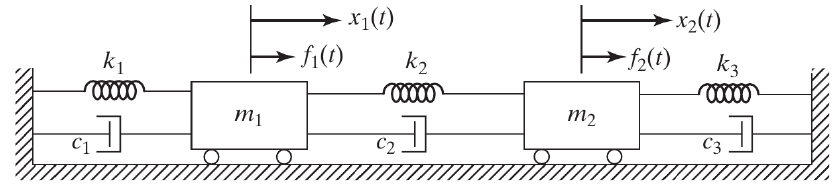

In [3]:
IPython.display.Image(b64decode(image_b64))

## Equação de movimento

A equação de movimento para este problema, na forma matricial, é

$$M \ddot X + C \dot X + K X = F,$$

onde 

$$ K = \begin{bmatrix}
k_1 + k_2 &  -k_2 \\
-k_2 & k_2+k_3
\end{bmatrix},\quad
C = \begin{bmatrix}
c_1 + c_2 &  -c_2 \\
-c_2 & c_2+c_3
\end{bmatrix},\quad
M = \begin{bmatrix}
m_1  & 0 \\
0 & m_2
\end{bmatrix},
$$

$$ X = \begin{bmatrix}
x_1(t) \\
x_2(t)
\end{bmatrix}\quad\text{e}\quad
F = \begin{bmatrix}
f_1(t) \\
F_2(t)
\end{bmatrix}.
$$

obs: eu não conseguir colocar em negrito, então as letras maiúsculas representam matrizes, em contraste com nossa convenção na sala de aula.


## Exemplo de sala


Vamos tratar o problema feito na sala de aula, com $F_1 = 0$, $F_2 = 1\,\mathrm{N}$,  $m_1 = 1\,\mathrm{kg}$,
$m_2 = 2\,\mathrm{kg}$, $c_1 = 0.2\,\mathrm{kg/s}$, $c_3 = 0.15\,\mathrm{kg/s}$, $k_2 = 40\,\mathrm{N/m}$,
$k_3 = 30\,\mathrm{N/m}$ e os outros termos nulos

A força $F_2$ é harmônica, mas a frequência será variável para estudarmos os diferentes comportamentos.

In [4]:
k1 = 0.0
k2 = 40.0
k3 = 30.0
c1 = 0.2
c2 = 0.0
c3 = 0.15
m1 = 1.0
m2 = 2.0
F10 = 0.0
F20 = 1.0

## Sistema mecânico
Vamos definir o sistema mecânico com as matrizes de massa, rigidez e amortecimento.

In [5]:
k = sp.Matrix([[k1+k2, -k2],
               [-k2, k2+k3]])
c = sp.Matrix([[c1+c2, -c2],
               [-c2, c2+c3]])
m = sp.Matrix([[m1, 0],
               [0, m2]])
display(k)
display(c)
display(m)

Matrix([
[ 40.0, -40.0],
[-40.0,  70.0]])

Matrix([
[0.2,    0],
[  0, 0.15]])

Matrix([
[1.0,   0],
[  0, 2.0]])

## Força externa

In [6]:
F0 = sp.Matrix([F10, F20])

## Frequências naturais
Apesar de não ser estritamente necessário, sempre é bom calcular as frequências naturais do problema, para ajudar a entender o comportamento.

In [7]:
ω_n = sp.symbols('ω_n')
Z0 = k - ω_n**2 * m
display(Z0)

Matrix([
[40.0 - 1.0*ω_n**2,             -40.0],
[            -40.0, 70.0 - 2.0*ω_n**2]])

### Equação característica

In [8]:
eqc = sp.det(Z0)
display(eqc)

2.0*ω_n**4 - 150.0*ω_n**2 + 1200.0

In [9]:
roots = sp.solve(eqc, ω_n)
roots = [ r for r in roots if r > 0]
print(roots)
ω_1 = min(roots)
ω_2 = max(roots)

[3.01752518978693, 8.11754530193712]


## Matriz de impedância mecânica
A matriz de impedância mecânica é

In [10]:
ω = sp.symbols('ω', real=True)
Ziw = k - ω**2*m + I*ω*c
display(Ziw)

Matrix([
[-1.0*ω**2 + 0.2*I*ω + 40.0,                       -40.0],
[                     -40.0, -2.0*ω**2 + 0.15*I*ω + 70.0]])

In [11]:
Ziw.inv()

Matrix([
[(-80.0*ω**2 + 6.0*I*ω + 2800.0)/(80.0*ω**4 - 22.0*I*ω**3 - 6001.2*ω**2 + 800.0*I*ω + 48000.0),                    1600.0/(80.0*ω**4 - 22.0*I*ω**3 - 6001.2*ω**2 + 800.0*I*ω + 48000.0)],
[                              40.0/(2.0*ω**4 - 0.55*I*ω**3 - 150.03*ω**2 + 20.0*I*ω + 1200.0), (-1.0*ω**2 + 0.2*I*ω + 40.0)/(2.0*ω**4 - 0.55*I*ω**3 - 150.03*ω**2 + 20.0*I*ω + 1200.0)]])

## Resolvendo para os deslocamentos

In [12]:
X = Ziw.inv()*F0
display(X)

Matrix([
[                       1600.0/(80.0*ω**4 - 22.0*I*ω**3 - 6001.2*ω**2 + 800.0*I*ω + 48000.0)],
[1.0*(-1.0*ω**2 + 0.2*I*ω + 40.0)/(2.0*ω**4 - 0.55*I*ω**3 - 150.03*ω**2 + 20.0*I*ω + 1200.0)]])

Percebam que os deslocamentos são complexos, com magnitude e fase.

## Magnitude

Vamos calcular a magnitude em função da frequência.


0.0333333333333333/sqrt(2.77777777777778e-6*ω**8 - 0.000416539930555556*ω**6 + 0.0189493061805556*ω**4 - 0.249772222222222*ω**2 + 1)

0.0333333333333333*sqrt(1.73611111111111e-9*ω**12 - 3.99156901041667e-7*ω**10 + 3.54376771701389e-5*ω**8 - 0.00151963914581771*ω**6 + 0.0320566729861111*ω**4 - 0.299747222222222*ω**2 + 1)/(2.77777777777778e-6*ω**8 - 0.000416539930555556*ω**6 + 0.0189493061805556*ω**4 - 0.249772222222222*ω**2 + 1.0)

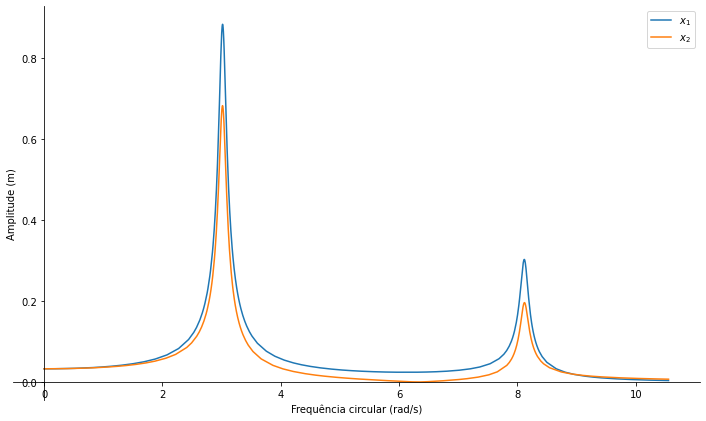

In [13]:
x1 = X[0]
x2 = X[1]
x1m = sp.sqrt(sp.re(x1)**2+sp.im(x1)**2).simplify() # A função embutida dá uma expressão muito complicada
x2m = sp.sqrt(sp.re(x2)**2+sp.im(x2)**2).simplify() # idem
display(x1m)
display(x2m)

p1 = sp.plot(x1m, (ω, 0, 1.3*ω_2), size=(10,6), xlabel="Frequência circular (rad/s)", ylabel="Amplitude (m)",
             show=False, label=r"$x_1$", legend=True) 
p2 = sp.plot(x2m, (ω, 0, 1.3*ω_2), show=False, label=r"$x_2$")
p1.extend(p2)
p1.show()

## Visualização da resposta

Excluindo o transiente é claro.

### Frequência da força de excitação

In [14]:
ω_f = 4.0 

In [15]:
x1w = x1.subs([(ω, ω_f)])
x2w = x2.subs([(ω, ω_f)])
#display(x1w)
#display(x2w)               
xt1 = sp.Abs(x1w)*sp.cos(ω_f*t+sp.arg(x1w))
xt2 = sp.Abs(x2w)*sp.cos(ω_f*t+sp.arg(x2w))
#display(xt1)
#display(xt2)

### Velocidade e aceleração

Para calcularmos as forças serão necessárias também a velocidade e a aceleração.

In [16]:
vt1 = xt1.diff(t)
vt2 = xt2.diff(t)
at1 = vt1.diff(t)
at2 = vt2.diff(t)

### Resposta na forma gráfica

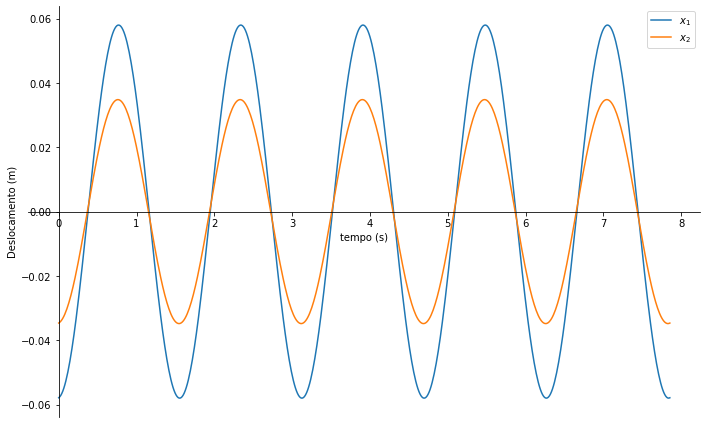

In [17]:
τe = 2*sp.pi/ω_f
p1 = sp.plot(xt1, (t, 0, 5*τe), size=(10,6), xlabel="tempo (s)", ylabel="Deslocamento (m)",
             show=False, label=r"$x_1$", legend=True, adaptive=False, nb_of_points=600) 
p2 = sp.plot(xt2, (t, 0, 5*τe), show=False, label=r"$x_2$", adaptive=False, nb_of_points=600)
p1.extend(p2)
p1.show()

## Animação

### Transformação para vetores do NumPy

Para trabalhar com o matplotlib, precisamos de vetores numéricos, não simbólicos do SymPy.

Para calcular as forças, vamos precisar das velocidades e acelerações também.

In [18]:
fxt1 = sp.lambdify(t, xt1, 'numpy')
fxt2 = sp.lambdify(t, xt2, 'numpy')
vxt1 = sp.lambdify(t, vt1, 'numpy')
vxt2 = sp.lambdify(t, vt2, 'numpy')
axt1 = sp.lambdify(t, at1, 'numpy')
axt2 = sp.lambdify(t, at2, 'numpy')

### Tempos para plotagem

Vamos fazer a animação por alguns períodos, e precisamos de um certo número de pontos em cada período para termos uma animação suave.


In [19]:
nτ = 3
npτ = 50
τ = 2*np.pi/ω_f
times = np.linspace(0, nτ*τ, nτ*npτ)

x1n = fxt1(times)
x2n = fxt2(times)
v1n = vxt1(times)
v2n = vxt2(times)
a1n = axt1(times)
a2n = axt2(times)

### Forças em cada massa

**Massa 1**:
A força elástica resultante na massa 1 é $F_{e}^1 = -k_1 x_1 + k_2(x_2 - x_1)$, ou 
$F_{e}^1 = -(k_1 + k_2) x_1 + k_2 x_2$.

Observe que, não por coincidência, isto é igual ao produto da primeira linha da matriz de rigidez pelo vetor de deslocamentos, com o sinal trocado.

Analogamente, a força resultante de amortecimento é dada por $F_{a}^1 = (-c_1 + c_2)\dot x_1 + c_2 \dot x_2 $, com a mesma interpretação.

A força é inércia é dada por $-m_1 \ddot x_1$.

**Massa 2**:
A força elástica resultante na massa 2 é $F_{e}^2 = -k_3 x_2 - k_2(x_2 - x_1)$, ou 
$F_{e}^1 = -(k_2 + k_3) x_2 + k_2 x_1$.

Observe que, não por coincidência, isto é igual ao produto da segunda linha da matriz de rigidez pelo vetor de deslocamentos, com o sinal trocado.

Analogamente, a força resultante de amortecimento é dada por $F_{a}^2 = (-c_2 + c_3)\dot x_2 + c_2 \dot x_1 $, com a mesma interpretação.

A força é inércia é dada por $-m_2 \ddot x_2$.

Podemos calcular todas estas forças para a plotagem abaixo.

In [20]:
Fe = -k@np.vstack((x1n, x2n))
Fa = -c@np.vstack((v1n, v2n))
Fi = -m@np.vstack((a1n, a2n))
Fmax = np.max(np.hstack((Fe, Fa, Fi)))
display(Fmax)

1.11373664326664

### Limites e dimensões para plotagem

Para determinar os limites de plotagem.

In [21]:
max1 = x1n.max()
max2 = x2n.max()
#print(max1, max2)

lref = max1+max2     # comprimento de referência
fuzz = 1.35          # uma folga
min_dist = fuzz*lref

max_dist = fuzz*2.0*(max1+max2)
lshape = 0.15*lref   # comprimento característo das massas

bbminx = -fuzz*max1
bbmaxx = min_dist+fuzz*max2
bbminy = -0.5*lshape
bbmaxy = 3*lshape
bbdx = bbmaxx - bbminx
bbdy = bbmaxy - bbminy
#print(bbminx, bbmaxx)
#print(bbminy, bbmaxy)

x2n += min_dist                 # to plot m2 on correct place

# Scale forces appropriately
Fes = Fe/Fmax*lshape
Fas = Fa/Fmax*lshape
Fis = Fi/Fmax*lshape

## Cria animação

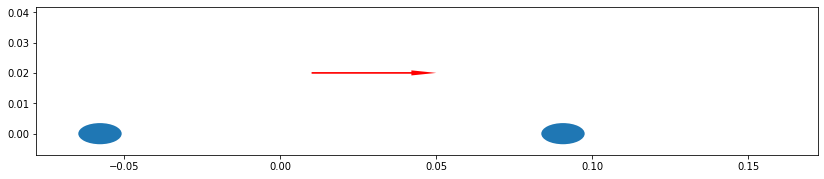

In [27]:
m1 = Ellipse((x1n[0],0), width=lshape, height=0.5*lshape)
m2 = Ellipse((x2n[0],0), width=lshape, height=0.5*lshape)
patches = PatchCollection([m1, m2])

ar = bbdx/bbdy
fig, ax = plt.subplots()

def draw_forces(x, y):
    fev =  Arrow(x, y, Fes[0], 0.0, fc='red')
    #fav =  Arrow(x, y+0.2*lshape, Fas[0], 0.0, fc='magenta')
    #fiv =  Arrow(x, y+0.4*lshape, Fis[0], 0.0, fc='green')
    
def init():
    fig.set_size_inches(14, 14/ar)
    ax.set_xlim(left=bbminx, right=bbmaxx)
    ax.set_ylim(bottom=bbminy, top=bbmaxy)
    ax.add_patch(m1)
    ax.add_patch(m2)
    m1.center = (x1n[0], 0)
    m2.center = (x2n[0], 0)
    return m1, m2

    
def animate(i):
    m1.center = (x1n[i], 0)
    m2.center = (x2n[i], 0)
    return m1, m2

init()
ax.add_patch(Arrow(0.01, 0.02, 0.04, 0.0, width=0.2*lshape, fc='red'))
#anim = animation.FuncAnimation(fig, animate,
#                               init_func=init,
#                               frames=x1n.size, 
#                               interval=30,
#                               blit=True)
#plt.close(fig)

## Animação

In [ ]:
#IPython.display.HTML(anim.to_html5_video())

In [28]:
m1.get_center()

(-0.05785403401671995, 0)

In [29]:
def f(x, y):
    print(x)
    print(y)
    
f(*m1.get_center())

-0.05785403401671995
0
